In [1]:
import warnings; warnings.simplefilter('ignore')

# import hotspot
import scanpy as sc
import muon as mu
import pandas as pd
import numpy as np
import mplscience
import os
# import new_misc_code as nmc a
import pickle
# hotspot.__version__

In [2]:
# adata=sc.read_h5ad('/home/maolp/data5/Gaofeng_All_matrix/Allcount/All_scanpyData/')

In [3]:
ls /home/maolp/data5/Gaofeng_All_matrix/Allcount/All_scanpyData/*h5ad

/home/maolp/data5/Gaofeng_All_matrix/Allcount/All_scanpyData/D2_scanpy_merge_rmdoubulet_log1p_PCA.h5ad*
/home/maolp/data5/Gaofeng_All_matrix/Allcount/All_scanpyData/D2_scanpy_merge_rmdoubulet_UMAP2.h5ad*


In [4]:
adata=sc.read_h5ad('/home/maolp/data5/Gaofeng_All_matrix/Allcount/All_scanpyData/Data/Scanpy_merge_rmdoubulet_UMAP_label_lastCell.h5ad')

In [5]:
adata0=sc.read_h5ad('/home/maolp/data5/Gaofeng_All_matrix/Allcount/Last_All_scanpyData2/D0.h5ad')

In [6]:
adata0=adata0[adata.obs_names]

In [7]:
adata0

View of AnnData object with n_obs × n_vars = 245834 × 36601
    obs: 'Name'

In [8]:
adata

AnnData object with n_obs × n_vars = 245834 × 31424
    obs: 'Name', 'doublet_scores', 'predicted_doublets', 'predicted_labels', 'over_clustering', 'majority_voting', 'conf_score', 'Cellname', 'AdjustedID', 'New_Body', 'Week', 'TCRBCRlabel', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'Last_cell_type', 'Cell_lineage', 'Last_cell_type2', 'Last_cell_type_num', 'Last_cell_type_num2'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'AdjustedID_colors', 'Cell_lineage_colors', 'Last_cell_type_num_colors', 'New_Body_colors', 'TCRBCRlabel_colors', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'majority_voting_colors', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    obsp: 'connectivities', 'distances'

In [9]:
adata0.obs_names.equals(adata.obs_names)

True

In [10]:
adata0.obs=adata.obs

In [11]:
# 对adata对象中的细胞根据"adjustedID"进行分组，并计算基因的总表达量
grouped = adata0.obs.groupby("AdjustedID")
bulk_like_data2 = {}
for group, indices in grouped.groups.items():
    expression_sum = np.sum(adata[indices].X, axis=0)
    bulk_like_data2[group] = expression_sum.A1 if hasattr(expression_sum, 'A1') else expression_sum

# 将基因的总表达量存储在一个新的pandas DataFrame中
bulk_like_data2 = pd.DataFrame(bulk_like_data2, index=adata.var.index)

# 展示前5行数据
print(bulk_like_data2.head())

              B11.6_P24  B12.0_P2   B17.4_P3    B18.0_P4   B18.6_P5  \
MIR1302-2HG    3.431483  0.000000   0.000000    0.884539   0.000000   
AL627309.1    34.734852  0.000000   2.746513   39.173618  23.519115   
AL627309.2     0.624334  0.000000   0.000000    0.000000   0.000000   
AL627309.5   131.140991  0.562243  10.349466  160.293961  78.246483   
AL627309.4     0.000000  0.000000   0.000000    0.000000   0.000000   

              B20.9_P7    B21.7_P8   B22.4_P9  B22.4_P23   B23.4_P10  ...  \
MIR1302-2HG   0.000000    1.691845   0.000000   3.784065    0.829347  ...   
AL627309.1   18.057026   44.351959  27.865271  31.152210   31.329298  ...   
AL627309.2    0.000000    1.274614   0.000000   0.000000    0.000000  ...   
AL627309.5   48.788349  103.689758  86.827072  82.046288  131.598328  ...   
AL627309.4    0.000000    0.000000   1.197433   0.000000    0.000000  ...   

              L10.0_P1   L10.1_P25   L18.6_P5   L24.6_P11    T10.0_P1  \
MIR1302-2HG   0.350639    1.512800   

In [12]:

grouped = adata.obs.groupby("AdjustedID")
bulk_like_data = {}
for group, indices in grouped.groups.items():
    expression_sum = np.sum(adata[indices].X, axis=0)
    bulk_like_data[group] = expression_sum.A1 if hasattr(expression_sum, 'A1') else expression_sum


bulk_like_data = pd.DataFrame(bulk_like_data, index=adata.var.index)

print(bulk_like_data.head())

              B11.6_P24  B12.0_P2   B17.4_P3    B18.0_P4   B18.6_P5  \
MIR1302-2HG    3.431483  0.000000   0.000000    0.884539   0.000000   
AL627309.1    34.734852  0.000000   2.746513   39.173618  23.519115   
AL627309.2     0.624334  0.000000   0.000000    0.000000   0.000000   
AL627309.5   131.140991  0.562243  10.349466  160.293961  78.246483   
AL627309.4     0.000000  0.000000   0.000000    0.000000   0.000000   

              B20.9_P7    B21.7_P8   B22.4_P9  B22.4_P23   B23.4_P10  ...  \
MIR1302-2HG   0.000000    1.691845   0.000000   3.784065    0.829347  ...   
AL627309.1   18.057026   44.351959  27.865271  31.152210   31.329298  ...   
AL627309.2    0.000000    1.274614   0.000000   0.000000    0.000000  ...   
AL627309.5   48.788349  103.689758  86.827072  82.046288  131.598328  ...   
AL627309.4    0.000000    0.000000   1.197433   0.000000    0.000000  ...   

              L10.0_P1   L10.1_P25   L18.6_P5   L24.6_P11    T10.0_P1  \
MIR1302-2HG   0.350639    1.512800   

In [13]:
%load_ext rpy2.ipython

R[write to console]: 载入需要的程辑包：ggplot2

R[write to console]: Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



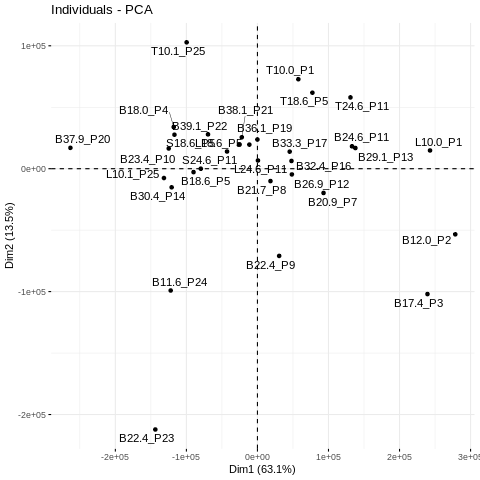

In [14]:
%%R -i bulk_like_data
pca <- prcomp(t(bulk_like_data))


library(factoextra)
pca
fviz_pca_ind(pca, repel=T) 

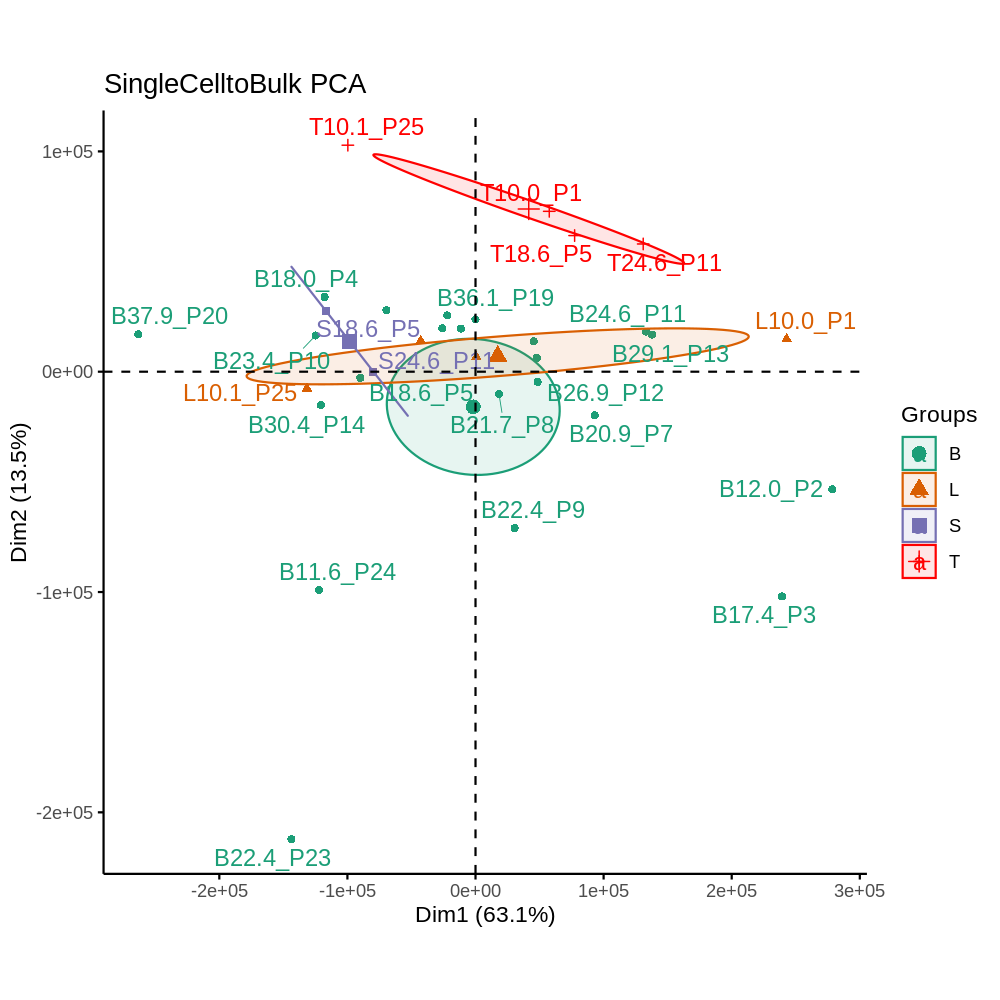

In [15]:
%%R -w 1000 -h 1000 -r 150

groups <- factor(substring(colnames(bulk_like_data),1,1))
fviz_pca_ind(pca,
             col.ind = groups, # color by groups
             palette =c('#1b9e77','#d95f02','#7570b3','red'),
             addEllipses = TRUE, # Concentration ellipses
             ellipse.type = "confidence",
             legend.title = "Groups",
             repel = TRUE,ggtheme = theme_classic(),title='SingleCelltoBulk PCA'
             )+theme(aspect.ratio = 1)

In [16]:
%%R
write.csv(bulk_like_data,'/home/maolp/data5/Gaofeng_All_matrix/Allcount/All_scanpyData/Data/bulk_like_data.csv')

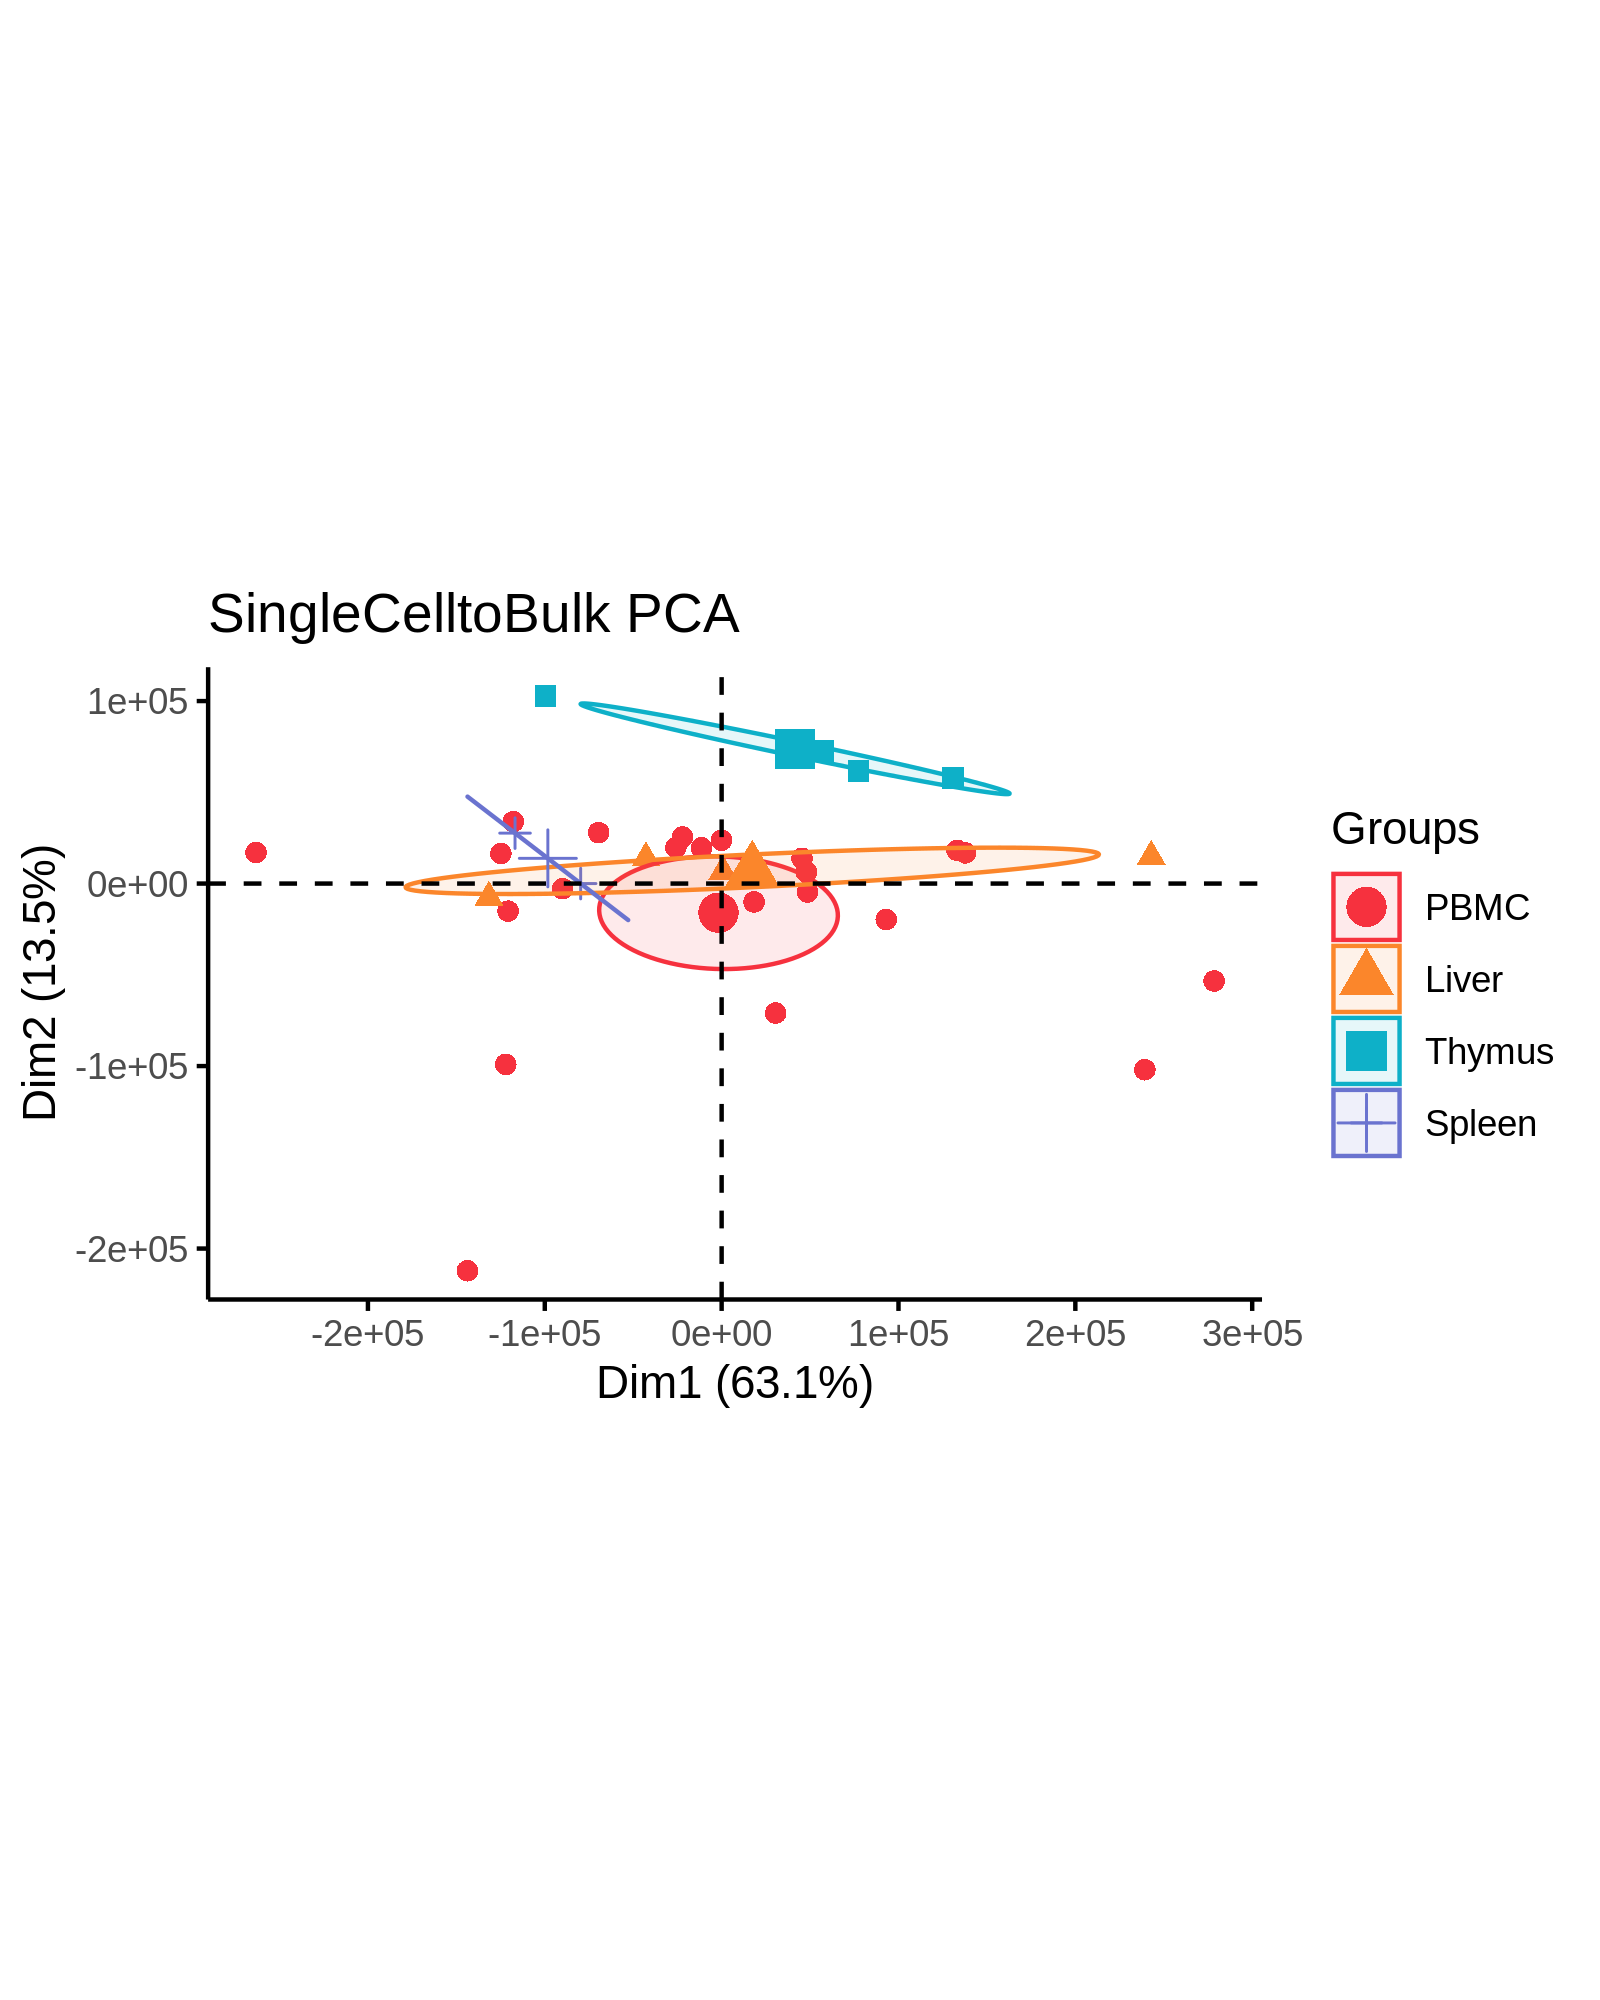

In [17]:
%%R -w 1600 -h 2000 -r 300

groups <- factor(substring(colnames(bulk_like_data),1,1),level=c('B','L','T','S'),labels=c('PBMC','Liver','Thymus','Spleen'))
# groups <- factor(Sample_MetainRNAseq$Organ,level=c('PBMC','Liver','Thymus','Spleen'))
fviz_pca_ind(pca,
             col.ind = groups, # color by groups
             palette =c("#F6313E","#fb862b","#0eb0c8","#6a73cf"),
             addEllipses = TRUE, # Concentration ellipses
             ellipse.type = "confidence",
             legend.title = "Groups",label=F,pointsize = 2.1,
             repel = TRUE,ggtheme = theme_classic(),title='SingleCelltoBulk PCA'
             )+theme(aspect.ratio = 0.6)

In [18]:
%%R
PBMClike=bulk_like_data[,grep('B',colnames(bulk_like_data))]

In [19]:
%%R
head(PBMClike)

              B11.6_P24  B12.0_P2  B17.4_P3    B18.0_P4   B18.6_P5 B20.9_P7
MIR1302-2HG   3.4314828 0.0000000  0.000000   0.8845392  0.0000000  0.00000
AL627309.1   34.7348518 0.0000000  2.746513  39.1736183 23.5191154 18.05703
AL627309.2    0.6243339 0.0000000  0.000000   0.0000000  0.0000000  0.00000
AL627309.5  131.1409912 0.5622427 10.349466 160.2939606 78.2464828 48.78835
AL627309.4    0.0000000 0.0000000  0.000000   0.0000000  0.0000000  0.00000
AP006222.2    1.2965595 0.0000000  0.000000   2.6461055  0.7228676  5.41338
              B21.7_P8  B22.4_P9  B22.4_P23   B23.4_P10   B24.6_P11 B26.9_P12
MIR1302-2HG   1.691845  0.000000  3.7840655   0.8293475   0.2934808  1.353323
AL627309.1   44.351959 27.865271 31.1522102  31.3292980  40.4384155 29.255173
AL627309.2    1.274614  0.000000  0.0000000   0.0000000   0.6940985  0.000000
AL627309.5  103.689758 86.827072 82.0462875 131.5983276 274.5414429 62.447945
AL627309.4    0.000000  1.197433  0.0000000   0.0000000   0.0000000  0.000000


In [20]:
%%R 
library(ClusterGVis)
library(data.table)
library(tidyverse)
library(data.table)
library(tidyverse)
library(tidyverse)
library("clusterProfiler")
library("org.Hs.eg.db")
library(ggplot2)
library(RColorBrewer)
library(gridExtra)
library(enrichplot)
library(ggsci)
library(ggrepel)
source("~/mao/Codeman/Project/All_Gao_ScanpyProject/Mainfun.R")

R[write to console]: 载入需要的程辑包：monocle

R[write to console]: 载入需要的程辑包：Matrix

R[write to console]: 载入需要的程辑包：Biobase

R[write to console]: 载入需要的程辑包：BiocGenerics

R[write to console]: 
载入程辑包：‘BiocGenerics’


R[write to console]: The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


R[write to console]: The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min


R[write to console]: Welcome to Bioconductor

    Vignettes contain introductory material; view with
    'browseVignettes()'. To cite Bioconductor, see
    'citation("Biobase")', and for packages 'citation("pkg

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.1     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ lubridate 1.9.2     ✔ tibble    3.2.1
✔ purrr     1.0.1     ✔ tidyr     1.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::between()         masks data.table::between()
✖ dplyr::combine()         masks Biobase::combine(), BiocGenerics::combine()
✖ tidyr::expand()          masks Matrix::expand()
✖ dplyr::filter()          masks stats::filter()
✖ dplyr::first()           masks data.table::first()
✖ lubridate::hour()        masks data.table::hour()
✖ lubridate::isoweek()     masks data.table::isoweek()
✖ dplyr::lag()             masks stats::lag()
✖ dplyr::last()            masks data.table::last()
✖ lubridate::mday()        masks data.table::mday()
✖ lubridate::minute()      masks data.table::minute()
✖ lubridate::month()       masks data.table::month()
✖ tidyr::pack()            mas

R[write to console]: 

R[write to console]: clusterProfiler v4.7.1.002  For help: https://yulab-smu.top/biomedical-knowledge-mining-book/

If you use clusterProfiler in published research, please cite:
T Wu, E Hu, S Xu, M Chen, P Guo, Z Dai, T Feng, L Zhou, W Tang, L Zhan, X Fu, S Liu, X Bo, and G Yu. clusterProfiler 4.0: A universal enrichment tool for interpreting omics data. The Innovation. 2021, 2(3):100141

R[write to console]: 
载入程辑包：‘clusterProfiler’


R[write to console]: The following object is masked from ‘package:purrr’:

    simplify


R[write to console]: The following object is masked from ‘package:stats’:

    filter


R[write to console]: 载入需要的程辑包：AnnotationDbi

R[write to console]: 载入需要的程辑包：IRanges

R[write to console]: 载入需要的程辑包：S4Vectors

R[write to console]: 
载入程辑包：‘S4Vectors’


R[write to console]: The following object is masked from ‘package:clusterProfiler’:

    rename


R[write to console]: The following objects are masked from ‘package:lubridate’:

    second, 

In [21]:
%%R
# using mfuzz for clustering
# mfuzz
cm <- clusterData(exp =bulk_like_data,
                  cluster.method = "mfuzz",
                  cluster.num = 16)

R[write to console]: 
载入程辑包：‘widgetTools’


R[write to console]: The following object is masked from ‘package:dplyr’:

    funs


R[write to console]: 
载入程辑包：‘DynDoc’


R[write to console]: The following object is masked from ‘package:BiocGenerics’:

    path




11 genes excluded.


In [22]:
%%R
colnames(bulk_like_data)

 [1] "B11.6_P24" "B12.0_P2"  "B17.4_P3"  "B18.0_P4"  "B18.6_P5"  "B20.9_P7" 
 [7] "B21.7_P8"  "B22.4_P9"  "B22.4_P23" "B23.4_P10" "B24.6_P11" "B26.9_P12"
[13] "B29.1_P13" "B30.4_P14" "B31.3_P15" "B32.4_P16" "B33.3_P17" "B34.1_P18"
[19] "B36.1_P19" "B37.9_P20" "B38.1_P21" "B39.1_P22" "L10.0_P1"  "L10.1_P25"
[25] "L18.6_P5"  "L24.6_P11" "T10.0_P1"  "T10.1_P25" "T18.6_P5"  "T24.6_P11"
[31] "S18.6_P5"  "S24.6_P11"


In [23]:
%%R
bulk_like_PBMC=bulk_like_data[,grep('B',colnames(bulk_like_data))]
colnames(bulk_like_PBMC)

 [1] "B11.6_P24" "B12.0_P2"  "B17.4_P3"  "B18.0_P4"  "B18.6_P5"  "B20.9_P7" 
 [7] "B21.7_P8"  "B22.4_P9"  "B22.4_P23" "B23.4_P10" "B24.6_P11" "B26.9_P12"
[13] "B29.1_P13" "B30.4_P14" "B31.3_P15" "B32.4_P16" "B33.3_P17" "B34.1_P18"
[19] "B36.1_P19" "B37.9_P20" "B38.1_P21" "B39.1_P22"


In [24]:
%%R
bulk_like_data
head(bulk_like_PBMC)

              B11.6_P24  B12.0_P2  B17.4_P3    B18.0_P4   B18.6_P5 B20.9_P7
MIR1302-2HG   3.4314828 0.0000000  0.000000   0.8845392  0.0000000  0.00000
AL627309.1   34.7348518 0.0000000  2.746513  39.1736183 23.5191154 18.05703
AL627309.2    0.6243339 0.0000000  0.000000   0.0000000  0.0000000  0.00000
AL627309.5  131.1409912 0.5622427 10.349466 160.2939606 78.2464828 48.78835
AL627309.4    0.0000000 0.0000000  0.000000   0.0000000  0.0000000  0.00000
AP006222.2    1.2965595 0.0000000  0.000000   2.6461055  0.7228676  5.41338
              B21.7_P8  B22.4_P9  B22.4_P23   B23.4_P10   B24.6_P11 B26.9_P12
MIR1302-2HG   1.691845  0.000000  3.7840655   0.8293475   0.2934808  1.353323
AL627309.1   44.351959 27.865271 31.1522102  31.3292980  40.4384155 29.255173
AL627309.2    1.274614  0.000000  0.0000000   0.0000000   0.6940985  0.000000
AL627309.5  103.689758 86.827072 82.0462875 131.5983276 274.5414429 62.447945
AL627309.4    0.000000  1.197433  0.0000000   0.0000000   0.0000000  0.000000


In [25]:
%%R
clusterdata=function (exp = NULL, scaleData = F, cluster.method = c("mfuzz", 
    "kmeans", "wgcna"), object = NULL, min.std = 0, cluster.num = NULL, 
    subcluster = NULL, seed = 5201314) 
{
    ComplexHeatmap::ht_opt(message = FALSE)
    cluster.method <- match.arg(cluster.method)
    if (cluster.method == "mfuzz") {
        myset <- Biobase::ExpressionSet(assayData = as.matrix(exp))
#          print(str(exp))
        myset <- Mfuzz::filter.std(myset, min.std = min.std, 
            visu = FALSE)
        if (scaleData == TRUE) {
            myset <- Mfuzz::standardise(myset)
        }
        else {
            myset <- myset
        }
        cluster_number <- cluster.num
        m <- Mfuzz::mestimate(myset)
        set.seed(seed)
       
        mfuzz1 <- function(eset, centers, m, ...) {
            cl <- e1071::cmeans(Biobase::exprs(eset), centers = centers, 
                method = "cmeans", m = m, ...)
        }
        mfuzz_res <- mfuzz1(myset, c = cluster_number, m = m)
        mtx <- Biobase::assayData(myset)
        mtx <- mtx$exprs
        raw_cluster_anno <- cbind(mtx, cluster = mfuzz_res$cluster)
        mem <- cbind(mfuzz_res$membership, cluster2 = mfuzz_res$cluster) %>% 
            as.data.frame() %>% dplyr::mutate(gene = rownames(.))
#         membership_info <- lapply(1:cluster.num, function(x) {
#             ms <- mem %>% dplyr::filter(cluster2 == x)
#             res <- data.frame(membership = ms[[x]], gene = ms$gene, 
#                 cluster2 = ms$cluster2)
#         }) %>% do.call("rbind", .)
#         dnorm <- cbind(myset@assayData$exprs, cluster = mfuzz_res$cluster) %>% 
#             as.data.frame() %>% dplyr::mutate(gene = rownames(.))
#         final_res <- merge(dnorm, membership_info, by = "gene") %>% 
#             dplyr::select(-cluster2) %>% dplyr::arrange(cluster)
#         if (!is.null(subcluster)) {
#             final_res <- final_res %>% dplyr::filter(cluster %in% 
#                 subcluster)
#         }
#         df <- reshape2::melt(final_res, id.vars = c("cluster", 
#             "gene", "membership"), variable.name = "cell_type", 
#             value.name = "norm_value")
#         df$cluster_name <- paste("cluster ", df$cluster, sep = "")
#         cltn <- table(final_res$cluster)
#         cl.info <- data.frame(table(final_res$cluster))
#         df <- purrr::map_df(unique(df$cluster_name), function(x) {
#             tmp <- df %>% dplyr::filter(cluster_name == x)
#             cn = as.numeric(unlist(strsplit(as.character(x), 
#                 split = "cluster "))[2])
#             tmp %>% dplyr::mutate(cluster_name = paste(cluster_name, 
#                 " (", cltn[cn], ")", sep = ""))
#         })
#         df$cluster_name <- factor(df$cluster_name, levels = paste("cluster ", 
#             1:nrow(cl.info), " (", cl.info$Freq, ")", sep = ""))
#         return(list(wide.res = final_res, long.res = df, type = cluster.method, 
#             geneMode = "none", geneType = "none"))
        return(mfuzz_res)
#         return(raw_cluster_anno)
    }}

In [26]:
%%R
library(TxDb.Hsapiens.UCSC.hg38.knownGene)
txdb<-TxDb.Hsapiens.UCSC.hg38.knownGene

if (T) {
  exon_txdb=exons(txdb) 
  genes_txdb=genes(txdb)
  o=findOverlaps(exon_txdb,genes_txdb) 
  o
  t1=exon_txdb[queryHits(o)]
  t2=genes_txdb[subjectHits(o)]
  t1=as.data.frame(t1)
  t1$geneid=mcols(t2)[,1]

  g_l=lapply(split(t1,t1$geneid), function(x){
    head(x)
    tmp=apply(x, 1,function(y){
      y[2]:y[3]
    })
    length(unique(unlist(tmp)))
  })
  head(g_l)
  g_l=data.frame(gene_id=names(g_l), length=as.numeric(g_l))
  save(g_l,file ='hg38_g_l.RData')
}

if(T) {
  t_l=transcriptLengths(txdb)
  head(t_l)
  t_l=na.omit(t_l)
  t_l=t_l[order(t_l$gene_id, t_l$tx_len, decreasing = T),]
  str(t_l)
  t_l=t_l[!duplicated(t_l$gene_id),]
  head(t_l)
  g_l=t_l[,c(3,5)]
}
 head(g_l)
 library(org.Hs.eg.db)
 s2g=toTable(org.Hs.egSYMBOL)
 head(s2g)
 gl=merge(g_l,s2g,by='gene_id') 

R[write to console]: 载入需要的程辑包：GenomicFeatures

R[write to console]:   1662 genes were dropped because they have exons located on both strands
  of the same reference sequence or on more than one reference sequence,
  so cannot be represented by a single genomic range.
  Use 'single.strand.genes.only=FALSE' to get all the genes in a
  GRangesList object, or use suppressMessages() to suppress this message.



'data.frame':	229531 obs. of  5 variables:
 $ tx_id  : int  242103 242102 242104 242101 242105 82816 262240 262238 82815 82814 ...
 $ tx_name: chr  "ENST00000543927.6" "ENST00000535425.5" "ENST00000252785.3" "ENST00000395693.8" ...
 $ gene_id: chr  "9997" "9997" "9997" "9997" ...
 $ nexon  : int  2 2 2 2 2 10 10 9 9 6 ...
 $ tx_len : int  1068 1002 992 984 664 6719 6719 6151 6088 2003 ...
 - attr(*, "na.action")= 'omit' Named int [1:42821] 6 7 8 10 11 13 14 15 16 17 ...
  ..- attr(*, "names")= chr [1:42821] "6" "7" "8" "10" ...


In [27]:
%%R
PBMCdata=bulk_like_data[,1:22]
PBMCdata$gene<-rownames(PBMCdata)

In [28]:
%%R
head(bulk_like_data)

              B11.6_P24  B12.0_P2  B17.4_P3    B18.0_P4   B18.6_P5 B20.9_P7
MIR1302-2HG   3.4314828 0.0000000  0.000000   0.8845392  0.0000000  0.00000
AL627309.1   34.7348518 0.0000000  2.746513  39.1736183 23.5191154 18.05703
AL627309.2    0.6243339 0.0000000  0.000000   0.0000000  0.0000000  0.00000
AL627309.5  131.1409912 0.5622427 10.349466 160.2939606 78.2464828 48.78835
AL627309.4    0.0000000 0.0000000  0.000000   0.0000000  0.0000000  0.00000
AP006222.2    1.2965595 0.0000000  0.000000   2.6461055  0.7228676  5.41338
              B21.7_P8  B22.4_P9  B22.4_P23   B23.4_P10   B24.6_P11 B26.9_P12
MIR1302-2HG   1.691845  0.000000  3.7840655   0.8293475   0.2934808  1.353323
AL627309.1   44.351959 27.865271 31.1522102  31.3292980  40.4384155 29.255173
AL627309.2    1.274614  0.000000  0.0000000   0.0000000   0.6940985  0.000000
AL627309.5  103.689758 86.827072 82.0462875 131.5983276 274.5414429 62.447945
AL627309.4    0.000000  1.197433  0.0000000   0.0000000   0.0000000  0.000000


In [29]:
%%R
head(gl)
Organdata=bulk_like_data
Organdata$gene<-rownames(Organdata)
Organdata2=merge(Organdata,gl,by.x='gene',by.y='symbol')
head(Organdata2)
Organdata2<-Organdata2[!duplicated(Organdata2$gene),]


In [30]:
%%R
c(1,grep("P5",colnames(Organdata2)),grep("P11",colnames(Organdata2)))
dim(Organdata2)
head(Organdata2)

      gene  B11.6_P24 B12.0_P2   B17.4_P3   B18.0_P4    B18.6_P5    B20.9_P7
1     A1BG 702.591492 3.080467 32.1439972 764.866150 1095.578857 420.7933960
2 A1BG-AS1 188.641846 0.000000  4.5333776 165.934479  142.522736 133.3590240
3     A1CF   0.000000 0.000000  1.5061690   0.000000    0.000000   1.0751737
4      A2M 166.983444 7.215054 29.7498112 992.101990  353.802521 287.9100647
5  A2M-AS1  76.372093 0.000000  5.6805439 330.443176   89.982590  55.9282303
6    A2ML1   7.651465 1.143770  0.9539388   2.490245    0.573301   0.5551631
    B21.7_P8   B22.4_P9  B22.4_P23  B23.4_P10  B24.6_P11  B26.9_P12 B29.1_P13
1 785.531494 586.642334 491.395111 904.876221 341.787262 592.865662 336.76865
2  76.283997 108.424072 130.693573 189.334122  47.928501  48.788082  57.42356
3   0.000000   1.277499   0.000000   0.000000   0.000000   2.077162   0.00000
4 100.883461 888.203186 316.071320 595.571655 239.238403 368.468109  51.54467
5  33.231606 153.352203 140.254700 174.039078  51.908417 110.052032  21

In [31]:
%%R
Organdata3=Organdata2[,c(1,grep("P5",colnames(Organdata2)),grep("P11",colnames(Organdata2)))] 

In [32]:
%%R
countToTpm <- function(counts, effLen)
{
  rate <- log(counts) - log(effLen)
  denom <- log(sum(exp(rate)))
  exp(rate - denom + log(1e6))
}

Organ_tpm=apply(Organdata2[,2:33], 2, function(x)countToTpm(x,Organdata2$tx_len)) %>% as.data.frame()
# apply(expdata_tpm, 2, function(x)sum(x))
rownames(Organ_tpm)<-Organdata2$gene
# expdata_tpm2=expdata_tpm



In [33]:
%%R
Organdata3=Organ_tpm[,c(grep("P5",colnames(Organ_tpm)),grep("P11",colnames(Organ_tpm)))] 

In [34]:
%%R
head(Organdata3)

            B18.6_P5    L18.6_P5    T18.6_P5    S18.6_P5  B24.6_P11   L24.6_P11
A1BG     37.29249291 29.14618321 57.25681550 34.27216082 23.5968228 44.19874410
A1BG-AS1  6.80233823  8.31650826 15.75787871 13.84749883  4.6396776  9.21691335
A1CF      0.00000000  0.06017803  0.00000000  0.00000000  0.0000000  0.01575252
A2M       8.83509806  9.50115630  5.98395396 10.00684491 12.1171709  7.97191277
A2M-AS1   3.53543001  3.61891834  6.38260636  4.13964272  4.1365800  2.29250894
A2ML1     0.01287273  0.04571000  0.05093277  0.09229816  0.2816713  0.09888464
         T24.6_P11   S24.6_P11
A1BG     50.347944 32.51429165
A1BG-AS1 14.473060 14.08522441
A1CF      0.000000  0.00000000
A2M       9.353607  6.65466122
A2M-AS1   6.678510  3.67749837
A2ML1     0.000000  0.09599377


In [35]:
%%R
library(tidyverse)
Organdata3$gene<-rownames(Organdata3)
Organ_tidy <-Organdata3%>%
  gather(key = "sample", value = "value", -gene)


Organ_tidy <- Organ_tidy %>%
  mutate(first_letter = substr(sample, 1, 1))


Organ_summary <- Organ_tidy %>%
  group_by(gene,first_letter) %>%
  summarise(mean_value = mean(value))

Organ_summary %>% head()
Organ_wide <- Organ_summary %>%
  spread(key =first_letter, value = mean_value) %>% as.data.frame()
rownames(Organ_wide)<-Organ_wide$gene
Organ_wide<-Organ_wide[,-1]

Organ_wide3<-Organ_wide[rowSums(Organ_wide)>0,]
Organ_wide3 %>% head()
Organ_wide3 <-Organ_wide3[,c(1,2,4,3)]
Organ_wide3 %>% head()

`summarise()` has grouped output by 'gene'. You can override using the
`.groups` argument.
                 B           L           T           S
A1BG     30.444658 36.67246366 53.80237969 33.39322624
A1BG-AS1  5.721008  8.76671081 15.11546913 13.96636162
A1CF      0.000000  0.03796528  0.00000000  0.00000000
A2M      10.476134  8.73653454  7.66878067  8.33075307
A2M-AS1   3.836005  2.95571364  6.53055796  3.90857054
A2ML1     0.147272  0.07229732  0.02546638  0.09414596


In [36]:
%%R -w 3000 -h 2000 -r 150

# %%R
# using mfuzz for clustering
# mfuzz
# pbmccmtest <- clusterdata(exp =bulk_like_data[,1:22],cluster.method = "mfuzz",cluster.num = 16)
Organ_wide3cm <- clusterData(exp =Organ_wide3 ,scaleData = T,
                  cluster.method = "mfuzz",
                  cluster.num = 16)

0 genes excluded.


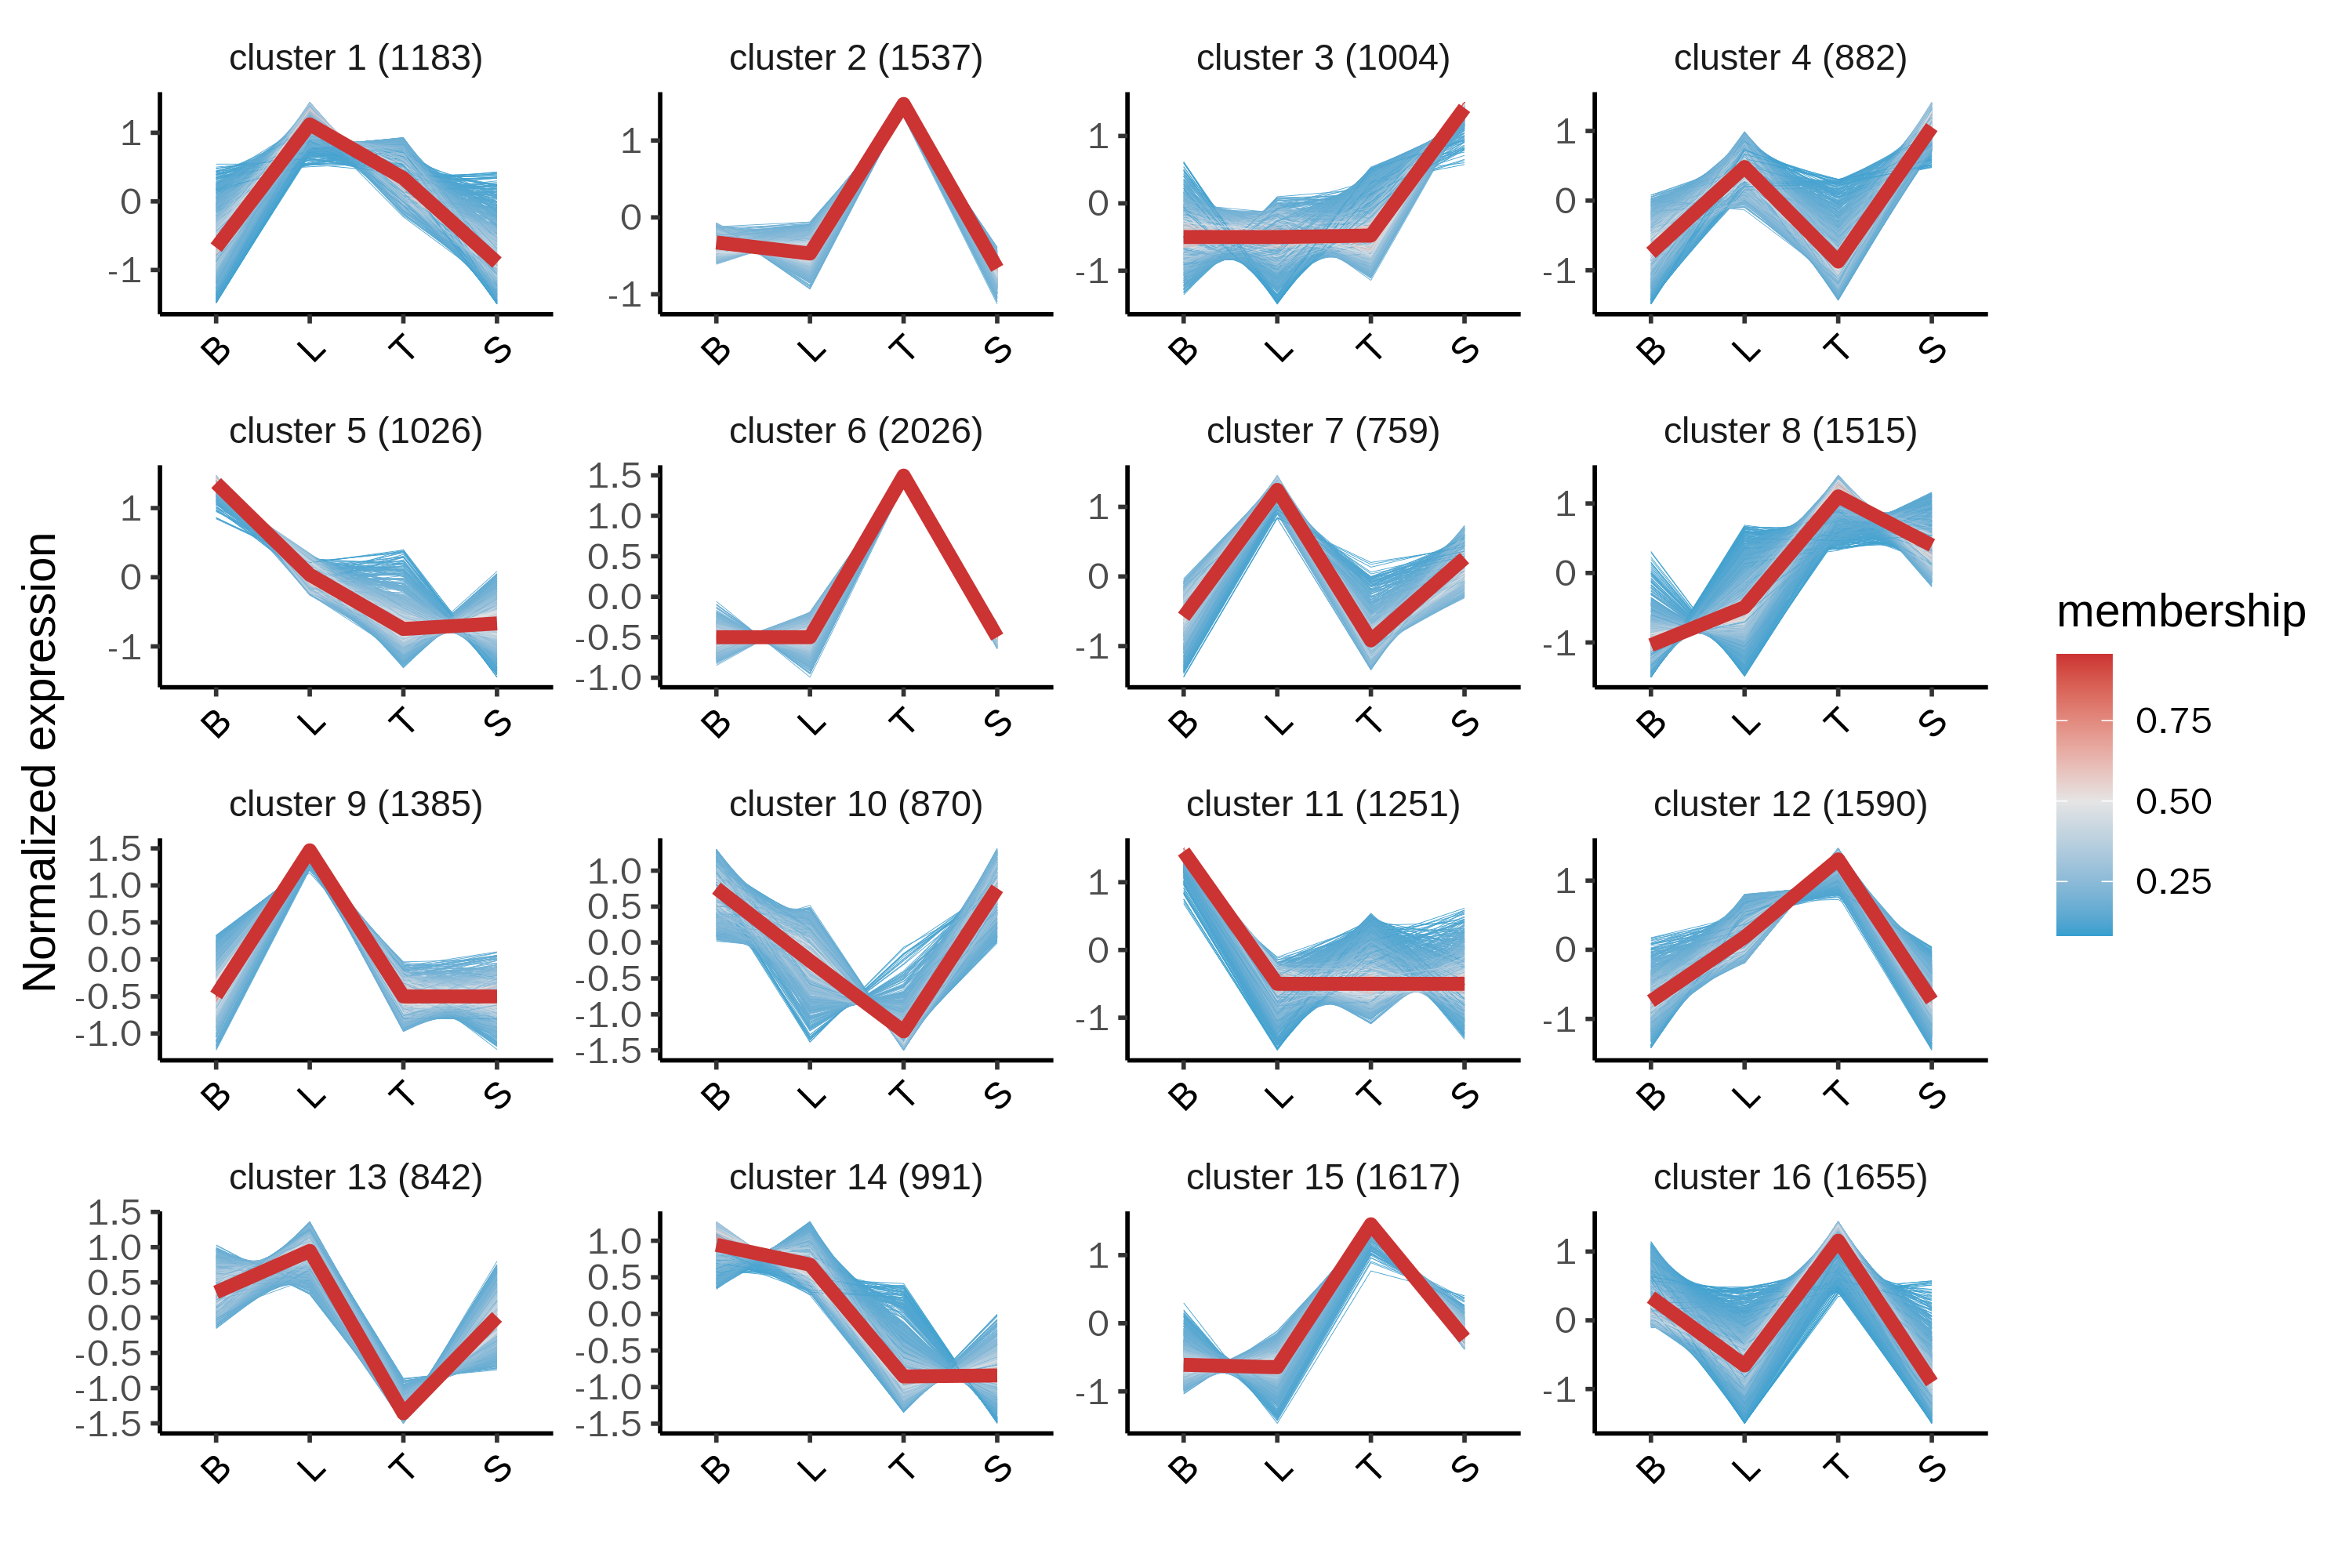

In [37]:
%%R -w 3000 -h 2000 -r 300
ClusterGVis::visCluster(object =Organ_wide3cm,
           plot.type = "line")

In [38]:
%%R
enrichOrgan_wide3m <- enrichCluster(object = Organ_wide3cm,
                        OrgDb = org.Hs.eg.db,
                        type = "BP",
                        pvalueCutoff = 0.05,
                        topn = 5,
                        seed = 666)

R[write to console]: 'select()' returned 1:1 mapping between keys and columns

R[write to console]: 'select()' returned 1:many mapping between keys and columns

R[write to console]: 'select()' returned 1:1 mapping between keys and columns

R[write to console]: 'select()' returned 1:1 mapping between keys and columns

R[write to console]: 'select()' returned 1:many mapping between keys and columns

R[write to console]: 'select()' returned 1:many mapping between keys and columns

R[write to console]: 'select()' returned 1:1 mapping between keys and columns

R[write to console]: 'select()' returned 1:many mapping between keys and columns

R[write to console]: 'select()' returned 1:1 mapping between keys and columns

R[write to console]: 'select()' returned 1:1 mapping between keys and columns

R[write to console]: 'select()' returned 1:many mapping between keys and columns

R[write to console]: 'select()' returned 1:1 mapping between keys and columns

R[write to console]: 'select()' retur

In [39]:
%%R
source("/home/maolp/Main_Gao_ScanpyProject20231130/HFB_script_in_save/color.R")

In [40]:
mkdir -p /home/maolp/Main_Gao_ScanpyProject20231130/HFB_Figure_Plot/Sup_Figure7/S51/

In [41]:
%%R -w 3500 -h 6000 -r 300
library(cols4all)
mycol=colorname2
pdf("/home/maolp/Main_Gao_ScanpyProject20231130/HFB_Figure_Plot/Sup_Figure7/S51/S51organ.pdf",width=10,height=16)
visCluster(object = Organ_wide3cm ,
           plot.type = "both",line.side = "left",show_row_dend = T,
#             go.col = rep(ggsci::pal_d3()(8),each = 5),
           column_names_rot = 45,
           ht.col.list =list(col_range = c(-2, 0, 2),
           col_color = c("#0da9ce", "white", "#e74a32")),go.col = rep(mycol, each = 5)[1:75], #将词云颜色修改为跟注释条一致
#            go.size = "pval", 
           add.box = F,annoTerm.data = enrichOrgan_wide3m)
dev.off()

R[write to console]: This palatte have 20 colors!



png 
  2 


In [42]:
# pdf("/home/maolp/Main_Gao_ScanpyProject20231130/HFB_Figure_Plot/Sup_Figure7/S51/S51organ.pdf",width=10,height=16)
# visCluster(object = Organ_wide3cm ,
#            plot.type = "both",line.side = "left",show_row_dend = T,
# #             go.col = rep(ggsci::pal_d3()(8),each = 5),
#            column_names_rot = 45,
#            ht.col.list =list(col_range = c(-2, 0, 2),
#            col_color = c("#0da9ce", "white", "#e74a32")),go.col = rep(mycol, each = 5)[1:75], #将词云颜色修改为跟注释条一致
# #            go.size = "pval", 
#            add.box = F,annoTerm.data = enrichOrgan_wide3m)
# dev.off()

In [43]:
# %%R
# pdf("/h")
# visCluster(object = Organ_wide3cm ,
#            plot.type = "both",line.side = "left",show_row_dend = T,
# #             go.col = rep(ggsci::pal_d3()(8),each = 5),
#            column_names_rot = 45,
#            ht.col.list =list(col_range = c(-2, 0, 2),
#            col_color = c("#0da9ce", "white", "#e74a32")),go.col = rep(mycol, each = 5)[1:75], #将词云颜色修改为跟注释条一致
# #            go.size = "pval", 
#            add.box = F,annoTerm.data = enrichOrgan_wide3m)
# dev.odff

In [44]:
%%R
head(gl)
PBMCdata2=merge(PBMCdata,gl,by.x='gene',by.y='symbol')
head(PBMCdata2)
PBMCdata2<-PBMCdata2[!duplicated(PBMCdata2$gene),]


In [45]:
%%R
countToTpm <- function(counts, effLen)
{
  rate <- log(counts) - log(effLen)
  denom <- log(sum(exp(rate)))
  exp(rate - denom + log(1e6))
}

PBMC_tpm=apply(PBMCdata2[,2:23], 2, function(x)countToTpm(x,PBMCdata2$tx_len)) %>% as.data.frame()
# apply(expdata_tpm, 2, function(x)sum(x))
rownames(PBMC_tpm)<-PBMCdata2$gene
# expdata_tpm2=expdata_tpm



In [46]:
pwd

'/data5/maolp/Main_Gao_ScanpyProject20231130/HFB_script_in_Jupyter/HFB0406Olink'

In [47]:
mkdir -p /home/maolp/Allcount/All_scanpyData/RNAseq/

In [48]:
%%R
write.csv(PBMC_tpm,'/home/maolp/Allcount/All_scanpyData/RNAseq/PBMC_tpm.csv')

In [49]:
%%R
head(PBMC_tpm)

          B11.6_P24  B12.0_P2   B17.4_P3    B18.0_P4    B18.6_P5    B20.9_P7
A1BG     19.2457921 1.0829142 5.20986215 23.85873457 37.29249291 27.08294251
A1BG-AS1  7.2454813 0.0000000 1.03025457  7.25763127  6.80233823 12.03498743
A1CF      0.0000000 0.0000000 0.08675082  0.00000000  0.00000000  0.02459117
A2M       3.3556681 1.8607574 3.53739243 22.70340325  8.83509806 13.59428772
A2M-AS1   2.4147578 0.0000000 1.06272832 11.89774716  3.53543001  4.15493269
A2ML1     0.1382572 0.2652325 0.10198990  0.05124061  0.01287273  0.02356991
            B21.7_P8   B22.4_P9   B22.4_P23   B23.4_P10  B24.6_P11   B26.9_P12
A1BG     33.41064479 27.8086249 14.27805276 28.83148339 23.5968228 35.86322501
A1BG-AS1  4.54936721  7.2065620  5.32462077  8.45868790  4.6396776  4.13812009
A1CF      0.00000000  0.0215199  0.00000000  0.00000000  0.0000000  0.04465159
A2M       3.14784911 30.8880946  6.73745564 13.92145123 12.1171709 16.35180230
A2M-AS1   1.63146801  8.3907758  4.70393765  6.40074563  4.1365800

In [50]:
%%R -w 3000 -h 2000 -r 150

# %%R
# using mfuzz for clustering
# mfuzz
# pbmccmtest <- clusterdata(exp =bulk_like_data[,1:22],cluster.method = "mfuzz",cluster.num = 16)
# pbmccm <- clusterData(exp =PBMC_tpm,scaleData = T,
#                   cluster.method = "mfuzz",
#                   cluster.num = 16)
head(PBMC_tpm)

          B11.6_P24  B12.0_P2   B17.4_P3    B18.0_P4    B18.6_P5    B20.9_P7
A1BG     19.2457921 1.0829142 5.20986215 23.85873457 37.29249291 27.08294251
A1BG-AS1  7.2454813 0.0000000 1.03025457  7.25763127  6.80233823 12.03498743
A1CF      0.0000000 0.0000000 0.08675082  0.00000000  0.00000000  0.02459117
A2M       3.3556681 1.8607574 3.53739243 22.70340325  8.83509806 13.59428772
A2M-AS1   2.4147578 0.0000000 1.06272832 11.89774716  3.53543001  4.15493269
A2ML1     0.1382572 0.2652325 0.10198990  0.05124061  0.01287273  0.02356991
            B21.7_P8   B22.4_P9   B22.4_P23   B23.4_P10  B24.6_P11   B26.9_P12
A1BG     33.41064479 27.8086249 14.27805276 28.83148339 23.5968228 35.86322501
A1BG-AS1  4.54936721  7.2065620  5.32462077  8.45868790  4.6396776  4.13812009
A1CF      0.00000000  0.0215199  0.00000000  0.00000000  0.0000000  0.04465159
A2M       3.14784911 30.8880946  6.73745564 13.92145123 12.1171709 16.35180230
A2M-AS1   1.63146801  8.3907758  4.70393765  6.40074563  4.1365800

In [59]:
%%R
# ＜18，＜24，＜30，＜36，＜42
library(tidyverse)


PBMC <-PBMC_tpm
# PBMC<-expdata3


PBMC_long <- PBMC %>%
  tibble::rownames_to_column('gene') %>%
  gather(key = 'B', value = 'value', -gene)


PBMC_long <- PBMC_long %>%
  mutate(B = as.numeric(str_extract(B, "\\d+")))


PBMC_long <- PBMC_long %>%
  mutate(stage = case_when(
    B < 16 ~ "10-16PCW",
    B < 22 ~ "16-22PCW",
    B < 28 ~ "22-28PCW",
    B < 34 ~ "28-34PCW",
    B <= 40 ~ "34-40PCW"
  ))

PBMC_mean <- PBMC_long %>%
  group_by(gene, stage) %>%
  summarise(mean_value = mean(value), .groups = 'drop')

PBMC_wide <- PBMC_mean %>%
  spread(key = stage, value = mean_value) %>% as.data.frame()
rownames(PBMC_wide)<-PBMC_wide$gene
PBMC_wide=PBMC_wide[,-1]
head(PBMC_wide)
PBMC_wide3<-PBMC_wide[rowSums(PBMC_wide)>0,]
head(PBMC_wide3)

           10-16PCW    16-22PCW   22-28PCW     28-34PCW     34-40PCW
A1BG     10.1643532 25.37093538 26.0756418 31.873979643 44.040007679
A1BG-AS1  3.6227407  6.33491574  5.9535337  7.163093939  7.893699016
A1CF      0.0000000  0.02226840  0.0132343  0.002418554  0.002702764
A2M       2.6082128 10.36360611 16.0031949 14.450694493  9.496048806
A2M-AS1   1.2073789  4.45646124  6.2632423  4.147534468  3.226173322
A2ML1     0.2017448  0.05413353  0.1100466  0.058775864  0.072669049


In [71]:
%%R
head(PBMC_long)
table(PBMC_long$stage,PBMC_long$B)

          
              11    12    17    18    20    21    22    23    24    26    29
  10-16PCW 20719 20719     0     0     0     0     0     0     0     0     0
  16-22PCW     0     0 20719 41438 20719 20719     0     0     0     0     0
  22-28PCW     0     0     0     0     0     0 41438 20719 20719 20719     0
  28-34PCW     0     0     0     0     0     0     0     0     0     0 20719
  34-40PCW     0     0     0     0     0     0     0     0     0     0     0
          
              30    31    32    33    34    36    37    38    39
  10-16PCW     0     0     0     0     0     0     0     0     0
  16-22PCW     0     0     0     0     0     0     0     0     0
  22-28PCW     0     0     0     0     0     0     0     0     0
  28-34PCW 20719 20719 20719 20719     0     0     0     0     0
  34-40PCW     0     0     0     0 20719 20719 20719 20719 20719


In [60]:
%%R
head(PBMC_wide3)

           10-16PCW    16-22PCW   22-28PCW     28-34PCW     34-40PCW
A1BG     10.1643532 25.37093538 26.0756418 31.873979643 44.040007679
A1BG-AS1  3.6227407  6.33491574  5.9535337  7.163093939  7.893699016
A1CF      0.0000000  0.02226840  0.0132343  0.002418554  0.002702764
A2M       2.6082128 10.36360611 16.0031949 14.450694493  9.496048806
A2M-AS1   1.2073789  4.45646124  6.2632423  4.147534468  3.226173322
A2ML1     0.2017448  0.05413353  0.1100466  0.058775864  0.072669049


In [61]:
%%R
dim(PBMC_wide3)

[1] 20383     5


In [62]:
%%R -w 3000 -h 2000 -r 150

# %%R
# using mfuzz for clustering
# mfuzz
# pbmccmtest <- clusterdata(exp =bulk_like_data[,1:22],cluster.method = "mfuzz",cluster.num = 16)
PBMC_wide3cm <- clusterData(exp =PBMC_wide3,scaleData = T,
                  cluster.method = "mfuzz",
                  cluster.num = 16)

0 genes excluded.


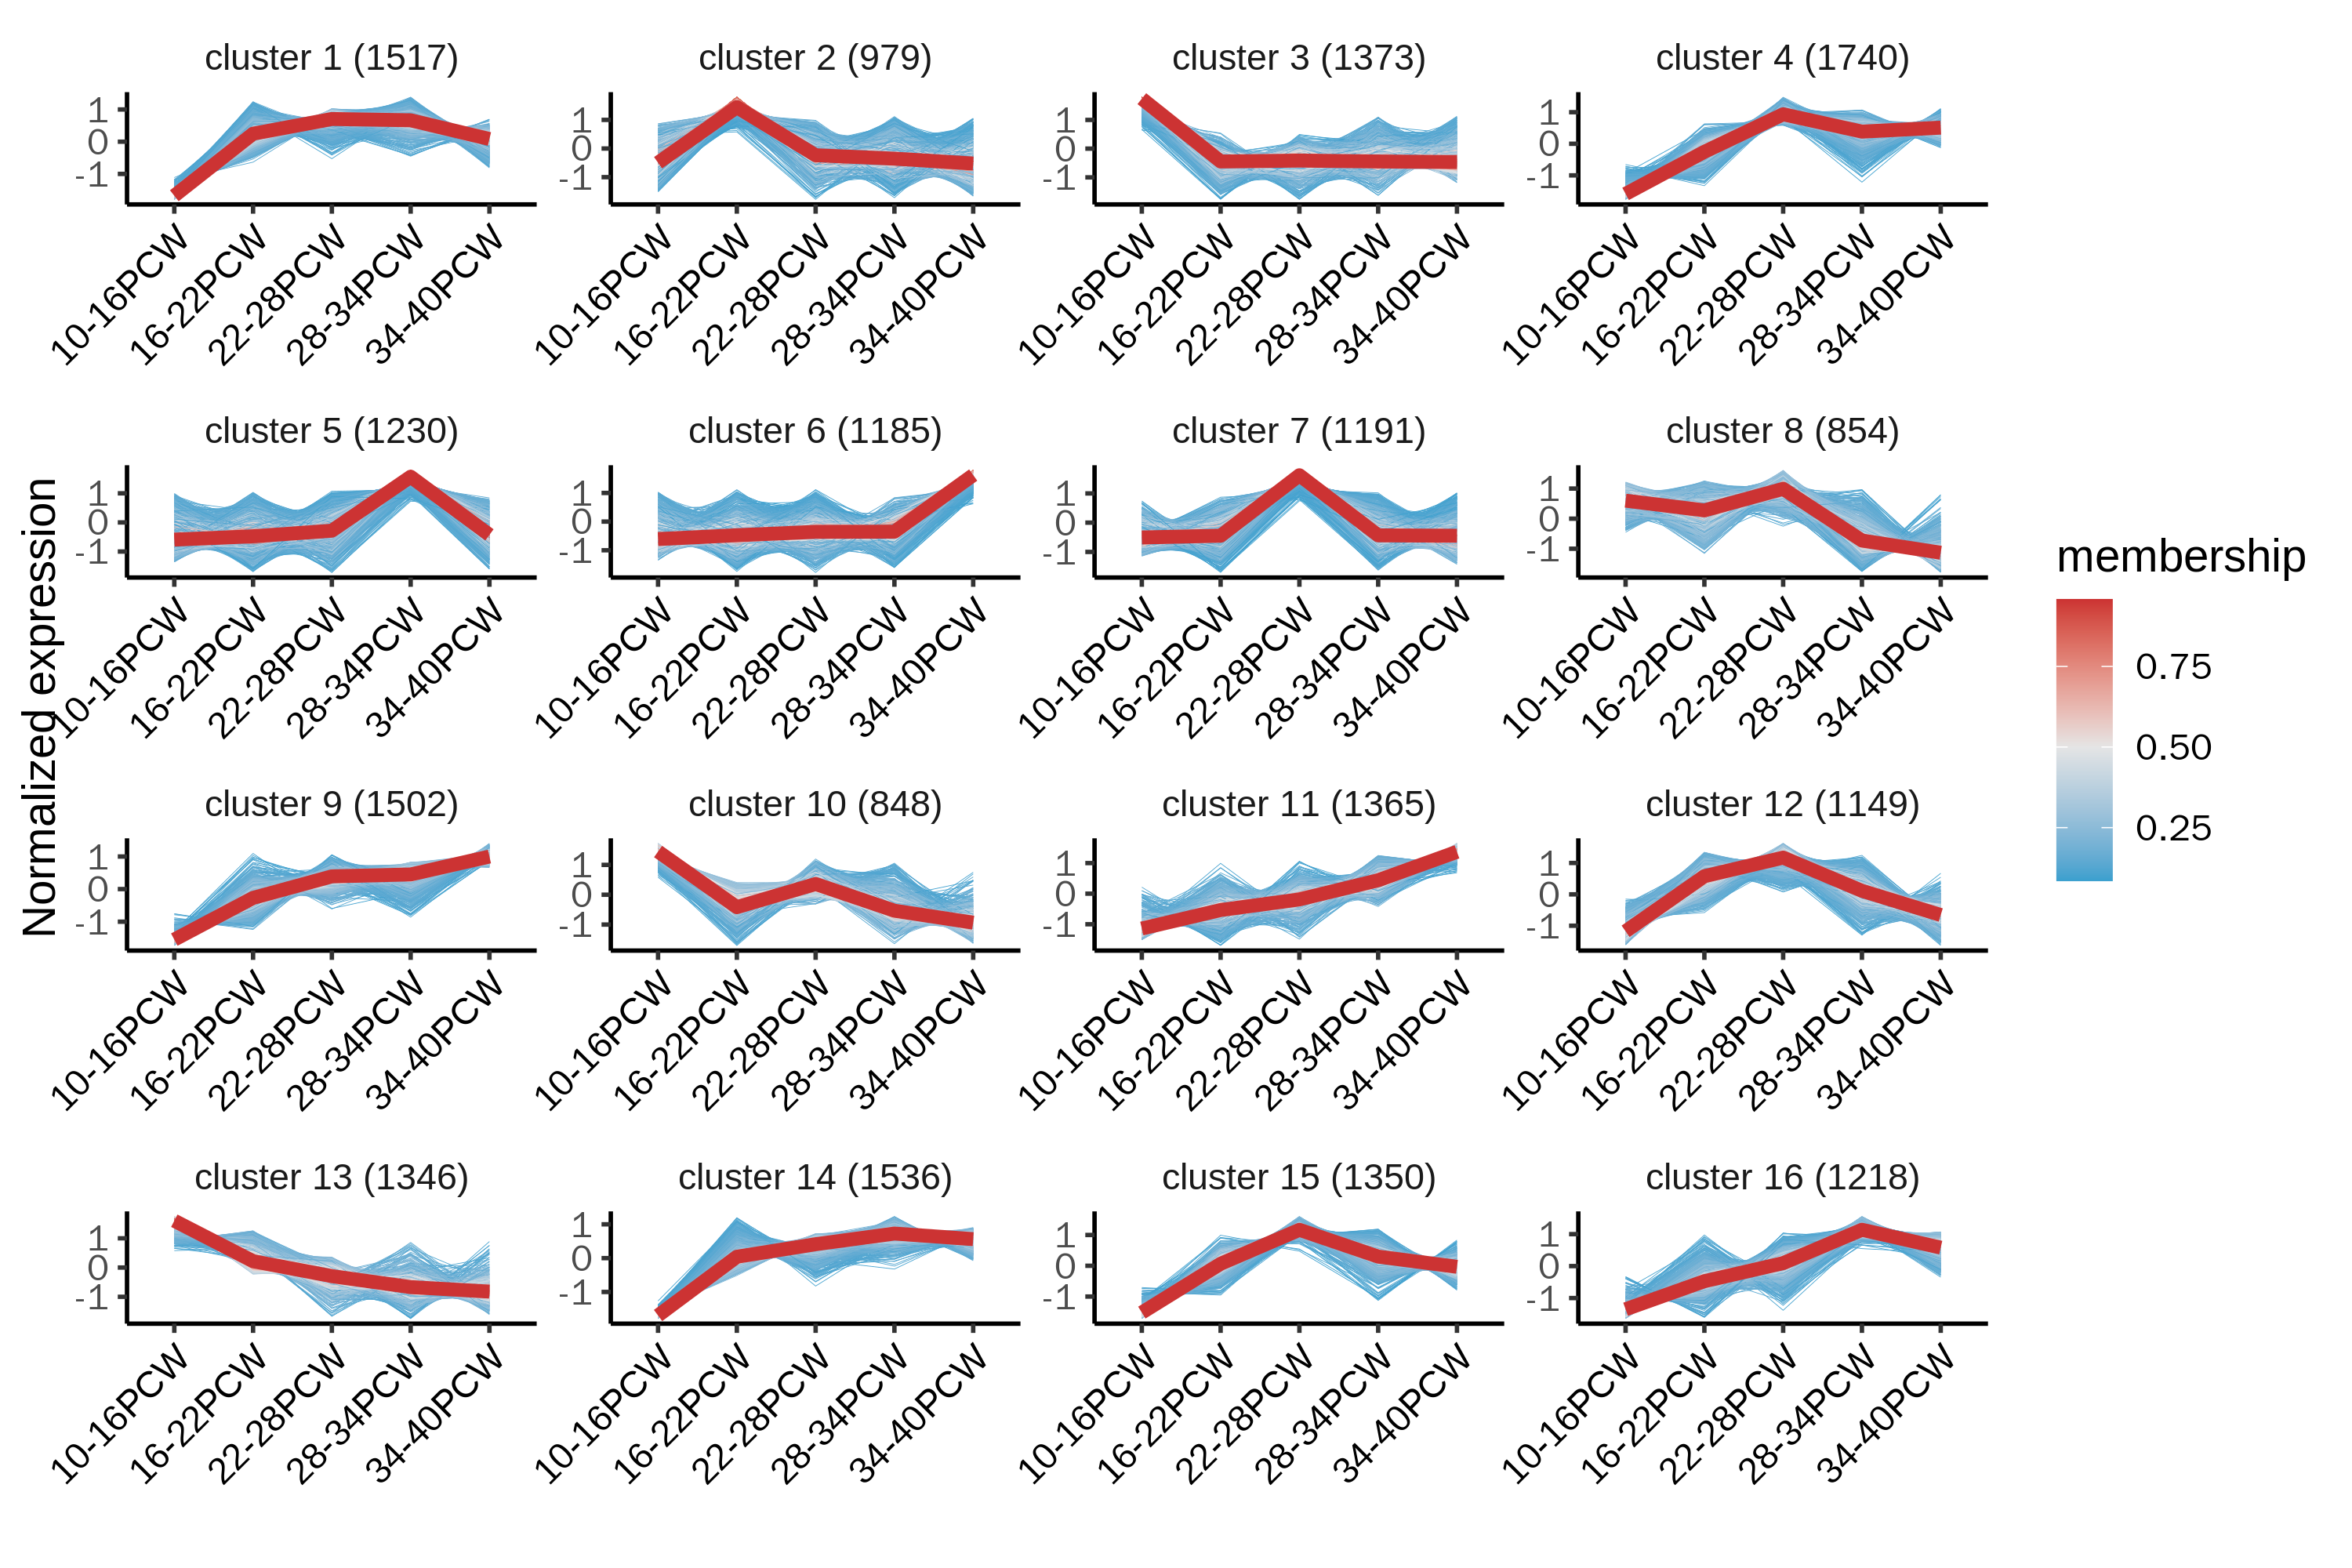

In [63]:
%%R -w 3000 -h 2000 -r 300
ClusterGVis::visCluster(object =PBMC_wide3cm,
           plot.type = "line")

In [64]:
%%R
enrichPBMC_wide3m <- enrichCluster(object = PBMC_wide3cm,
                        OrgDb = org.Hs.eg.db,
                        type = "BP",
                        pvalueCutoff = 0.05,
                        topn = 5,
                        seed = 666)

R[write to console]: 'select()' returned 1:1 mapping between keys and columns

R[write to console]: 'select()' returned 1:many mapping between keys and columns

R[write to console]: 'select()' returned 1:many mapping between keys and columns

R[write to console]: 'select()' returned 1:many mapping between keys and columns

R[write to console]: 'select()' returned 1:1 mapping between keys and columns

R[write to console]: 'select()' returned 1:1 mapping between keys and columns

R[write to console]: 'select()' returned 1:1 mapping between keys and columns

R[write to console]: 'select()' returned 1:1 mapping between keys and columns

R[write to console]: 'select()' returned 1:1 mapping between keys and columns

R[write to console]: 'select()' returned 1:many mapping between keys and columns

R[write to console]: 'select()' returned 1:1 mapping between keys and columns

R[write to console]: 'select()' returned 1:many mapping between keys and columns

R[write to console]: 'select()' retur

In [65]:
%%R -w 3000 -h 1200 -r 180
cols01 <- c("#f49128", "#194a55", "#187c65", "#f26115", "#c29f62", "#83ba9e")
cols02 <- c("#c62d17", "#023f75", "#ea894e", "#266b69", "#eb4601", "#f6c619")
cols03 <- c("#fa6e01", "#2f2f2f", "#972b1d", "#e6a84b", "#4c211b", "#ff717f")
cols04 <- c("#223e9c", "#b12b23", "#aebea6", "#edae11", "#0f6657", "#c74732")
cols05 <- c("#6a73cf", "#edd064", "#0eb0c8", "#f2ccac", "#a1d5b9", "#e1abbc")

all_colors <- c(cols01, cols02, cols03, cols04, cols05)
all_colors
colorname2=c("#46A040","#00AF99" ,"#98D9E9" ,"#F6313E", "#FFA300","#2f2f2f",  "#FFC179", 
"#FF5A00", "#663366","#FF6666","#8F1336", "#0081C9", "#001588", "#CC0033",
"#CC9966","#CC0033","#999933","#009966","#CCCC33","#CCFF99","#0eb0c8","#993333","#333366",
"#490C65", "#BA7FD0","#A6CEE3", "#1F78B4", "#DE77AE", "#B2DF8A", "#006D2C", "#B5AD64",
"#9DA8E2","#91C392", "#194a55", "#187c65", "#c29f62","#f49128","#c62d17", "#333329",
"#023f75", "#ea894e", "#266b69",  "#e1abbc","#f6c619","#fa6e01", "#972b1d", "#e6a84b", "#4c211b", "#ff717f","#223e9c", 
"#aebea6", "#edae11", "#c74732", "#6a73cf", "#edd064" , 
"#0eb0c8", "#f2ccac" ,"#868686","#339966", "#83ba9e", "#b12b23", "#0f6657","#f26115","#eb4601")
colorname3=colorname2
length(colorname3)

[1] 64


R[write to console]: This palatte have 20 colors!

R[write to console]: 错误: Cannot create zero-length unit vector ("unit" subsetting)




错误: Cannot create zero-length unit vector ("unit" subsetting)


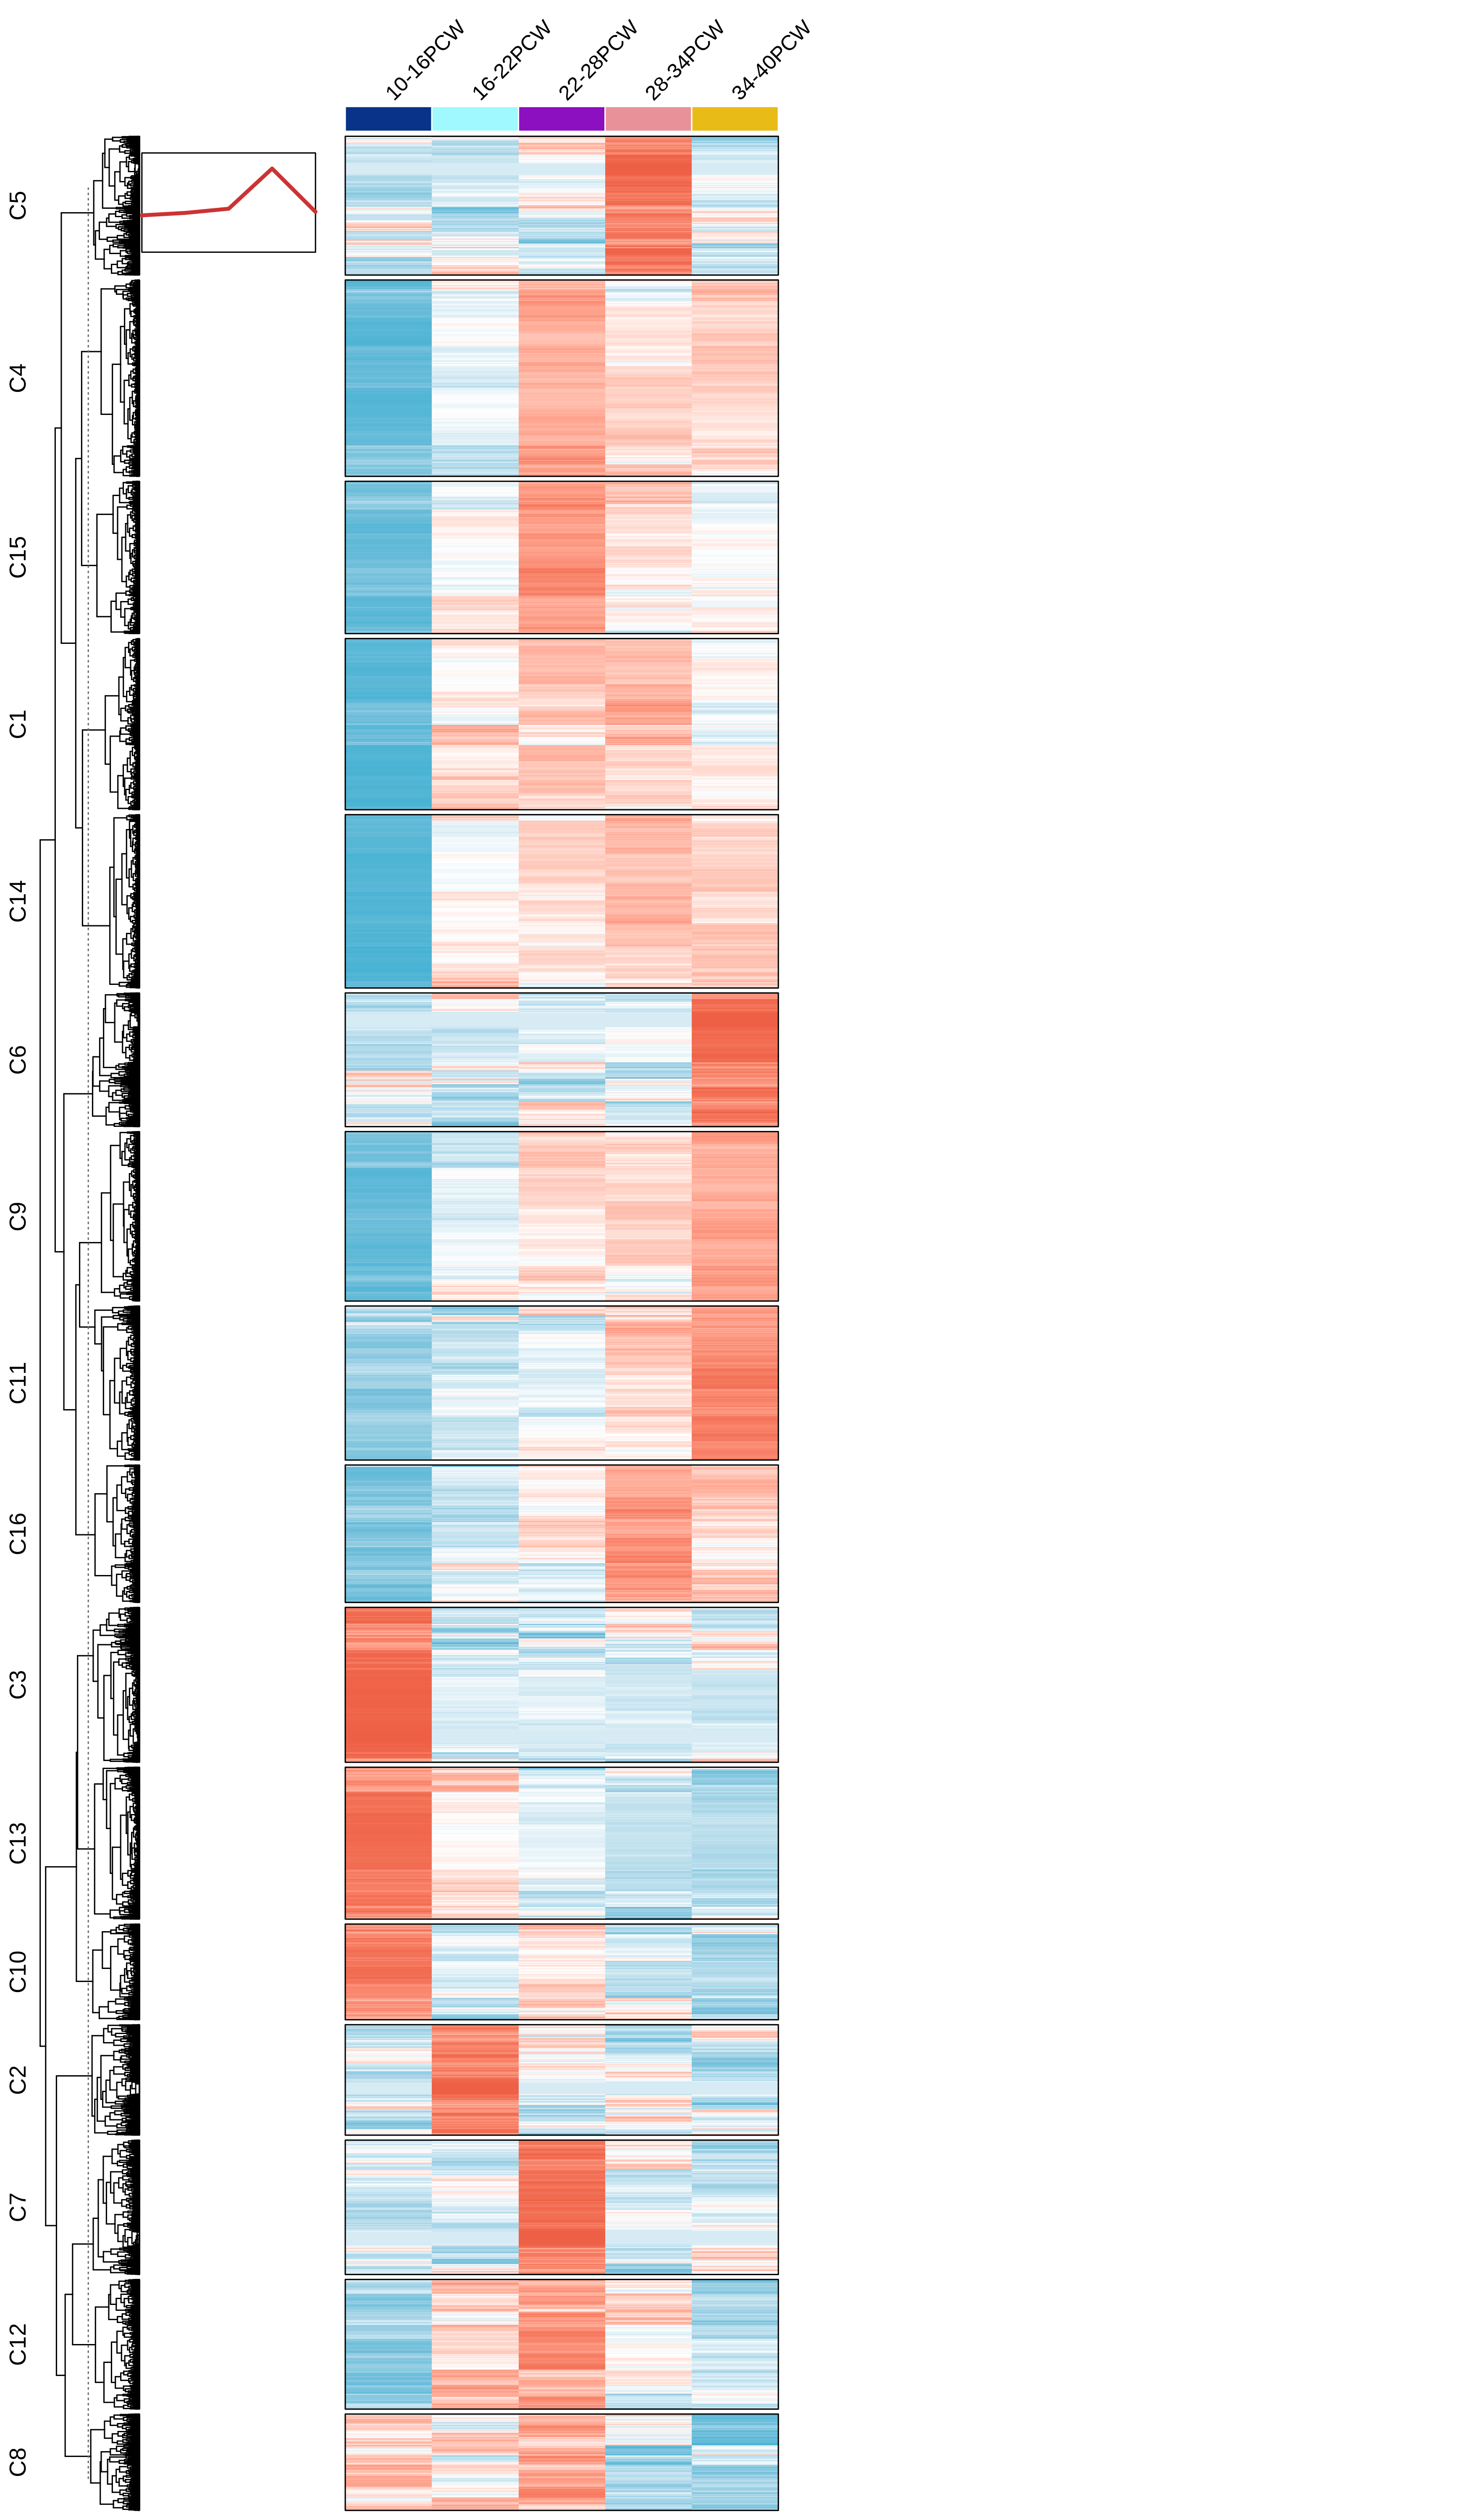

RInterpreterError: Failed to parse and evaluate line 'library(cols4all)\nmycol=colorname2\nvisCluster(object = PBMC_wide3cm ,\n           plot.type = "both",line.side = "left",show_row_dend = T,row_dend_width = unit(2, "cm"),\n#             go.col = rep(ggsci::pal_d3()(8),each = 5),\n           column_names_rot = 45,\n           ht.col.list =list(col_range = c(-2, 0, 2),\n           col_color = c("#0da9ce", "white", "#e74a32")),go.col = rep(mycol, each = 5)[1:75], #将词云颜色修改为跟注释条一致\n#            go.size = "pval", \n           add.box = F,annoTerm.data = enrichPBMC_wide3m)\n'.
R error message: '错误: Cannot create zero-length unit vector ("unit" subsetting)'

In [67]:
%%R -w 3500 -h 6000 -r 300
library(cols4all)
mycol=colorname2
visCluster(object = PBMC_wide3cm ,
           plot.type = "both",line.side = "left",show_row_dend = T,row_dend_width = unit(2, "cm"),
#             go.col = rep(ggsci::pal_d3()(8),each = 5),
           column_names_rot = 45,
           ht.col.list =list(col_range = c(-2, 0, 2),
           col_color = c("#0da9ce", "white", "#e74a32")),go.col = rep(mycol, each = 5)[1:75], #将词云颜色修改为跟注释条一致
#            go.size = "pval", 
           add.box = F,annoTerm.data = enrichPBMC_wide3m)

R[write to console]: This palatte have 20 colors!



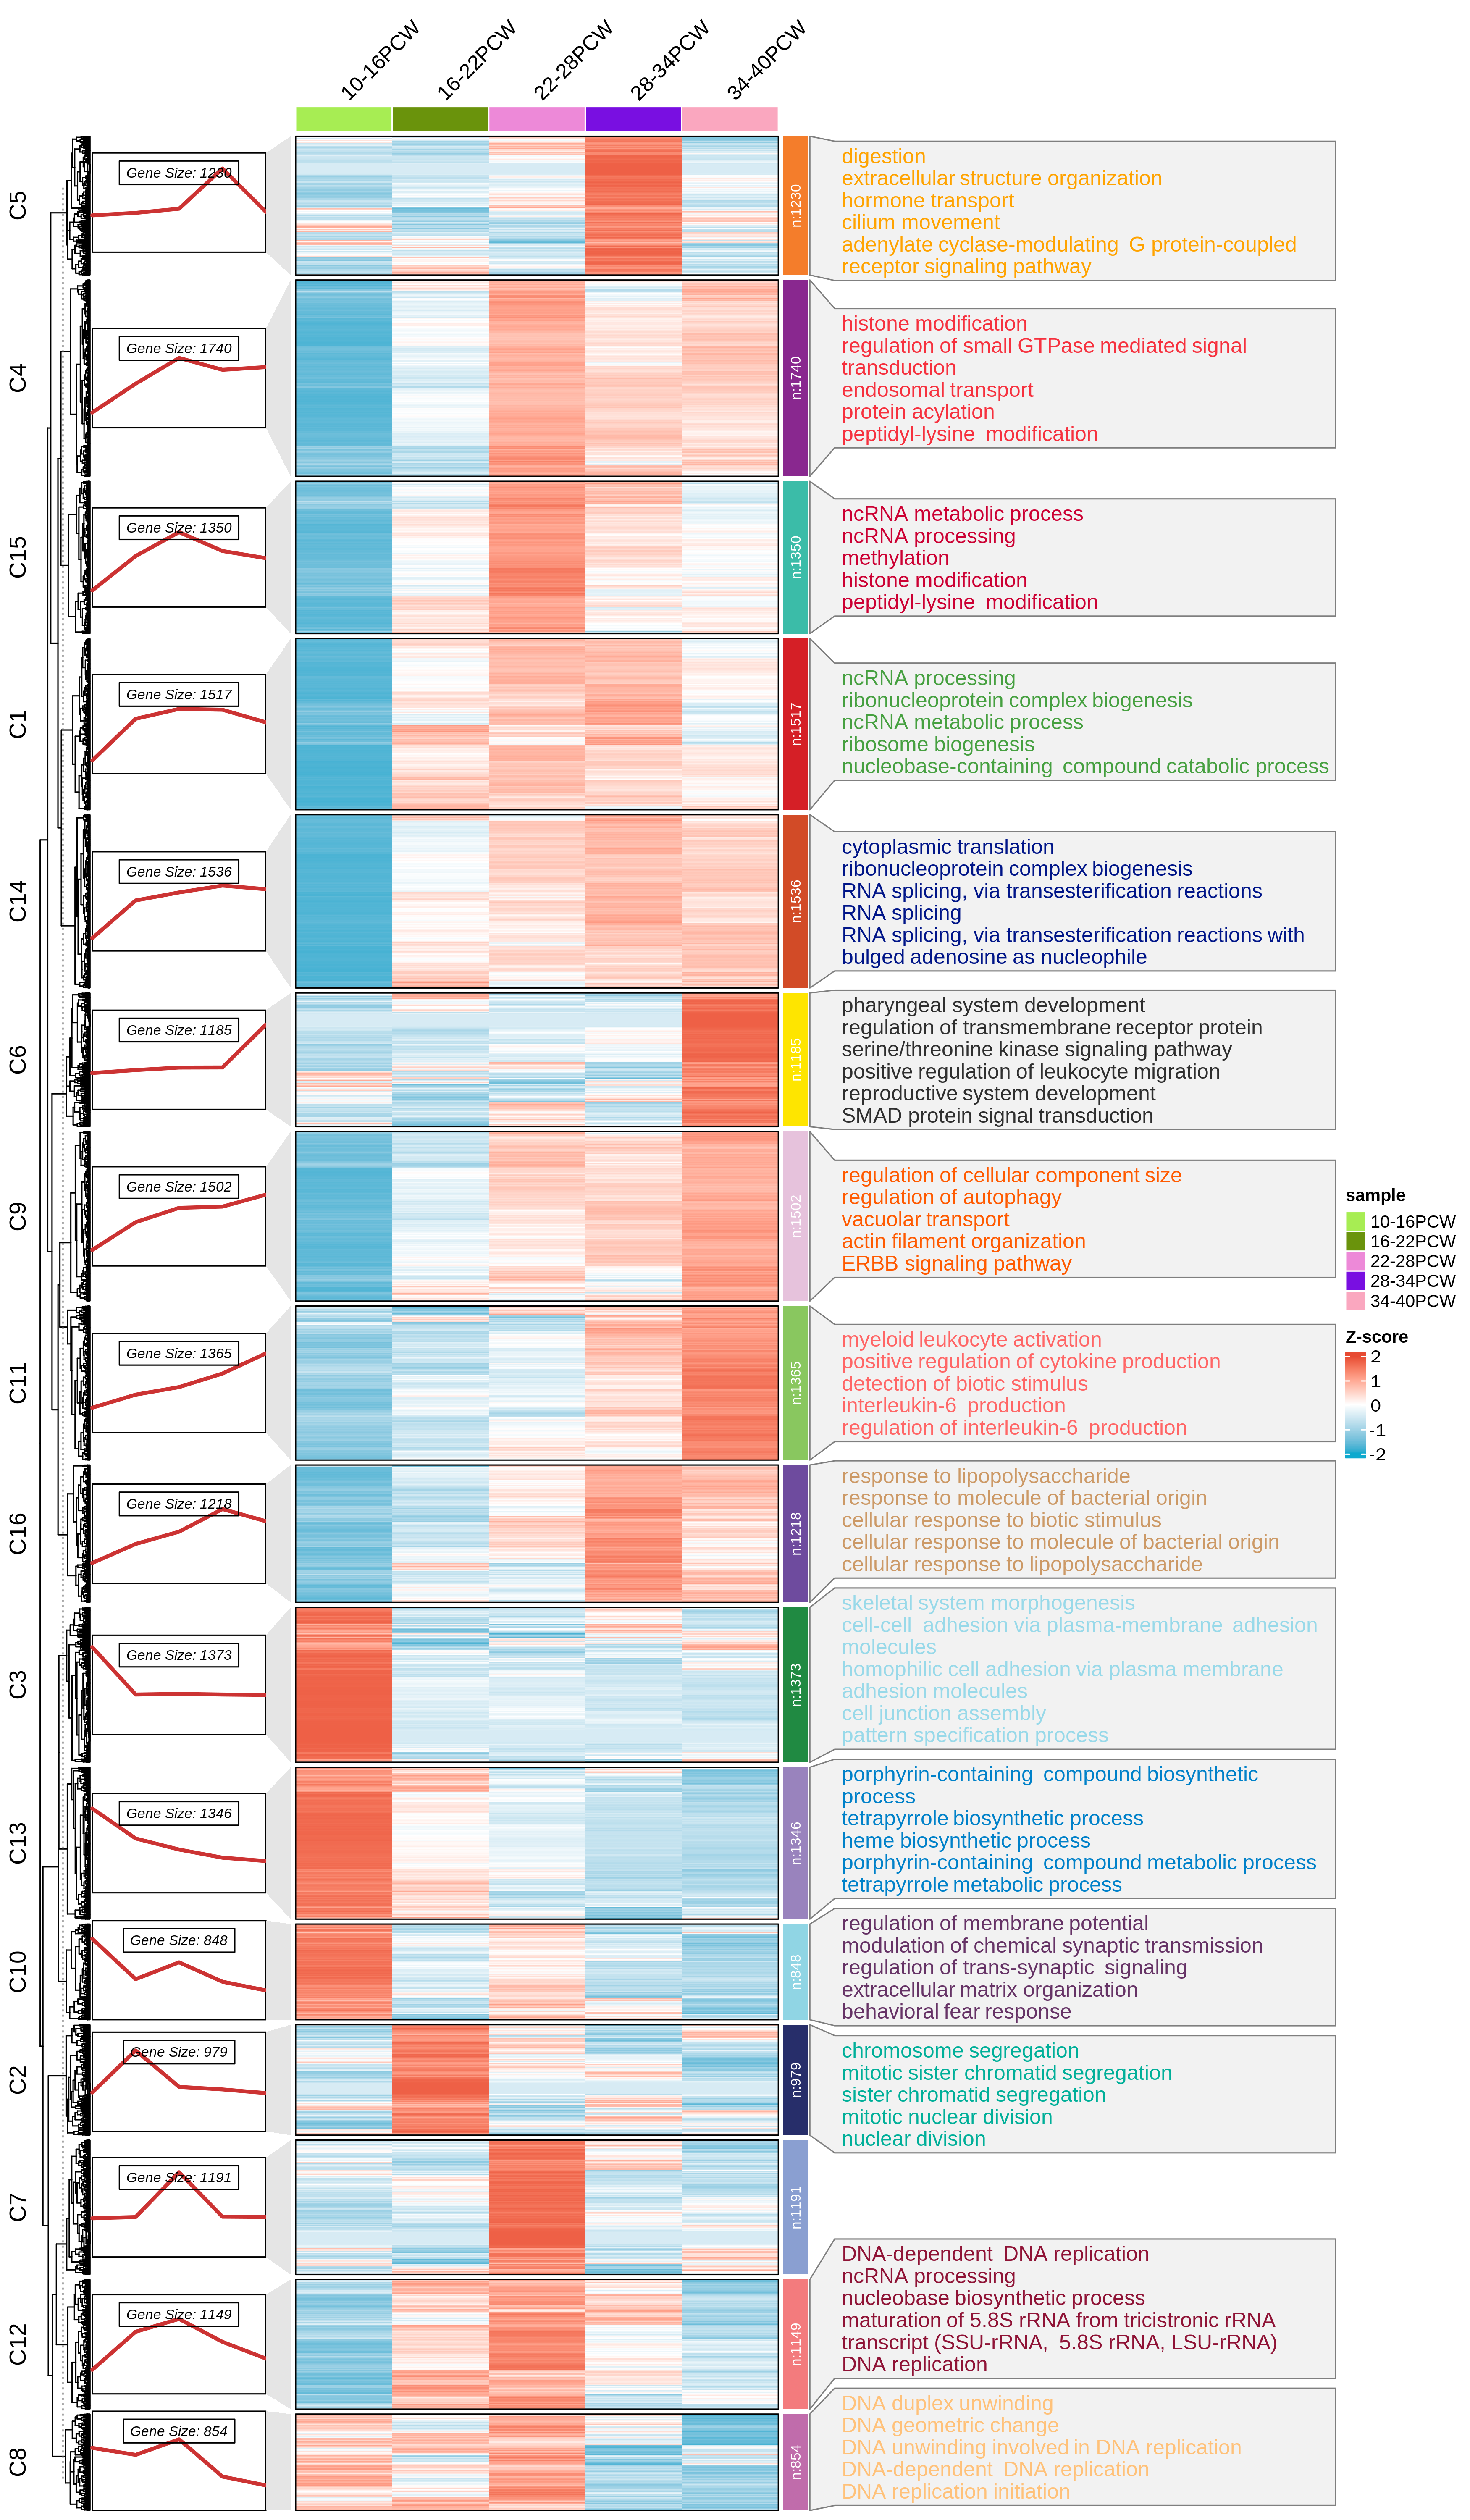

In [69]:
%%R -w 3500 -h 6000 -r 300
library(cols4all)
mycol=colorname2

ClusterGVis::visCluster(object = PBMC_wide3cm,
           plot.type = "both",line.side = "left",
#             go.col = rep(ggsci::pal_d3()(8),each = 5),
           column_names_rot = 45,
           ht.col.list =list(col_range = c(-2, 0, 2),
           col_color = c("#0da9ce", "white", "#e74a32")),go.col = rep(mycol, each = 5)[1:75], #将词云颜色修改为跟注释条一致
#            go.size = "pval", 
           add.box = F,annoTerm.data = enrichPBMC_wide3m)

In [ ]:
mkdir -p /home/maolp/Main_Gao_ScanpyProject20231130/HFB_Figure_Plot/Sup_Figure7/S49

In [73]:
%%R
pdf("/home/maolp/Main_Gao_ScanpyProject20231130/HFB_Figure_Plot/Sup_Figure7/S49/S49_2024.pdf",width=10,height=16)

ClusterGVis::visCluster(object = PBMC_wide3cm,
           plot.type = "both",line.side = "left",
#             go.col = rep(ggsci::pal_d3()(8),each = 5),
           column_names_rot = 45,
           ht.col.list =list(col_range = c(-2, 0, 2),
           col_color = c("#0da9ce", "white", "#e74a32")),go.col = rep(mycol, each = 5)[1:75], #将词云颜色修改为跟注释条一致
#            go.size = "pval", 
           add.box = F,annoTerm.data = enrichPBMC_wide3m)
dev.off()

R[write to console]: This palatte have 20 colors!



png 
  2 


In [ ]:
%%R
save.image(file = "/home/maolp/Main_Gao_ScanpyProject20231130/HFB_script_in_Jupyter/HFB0406Olink/Figure6_heatmap/F6_heatmap/F6.Rdata")

In [ ]:
%%R
save.image(file = "/home/maolp/Main_Gao_ScanpyProject20231130/HFB_Figure_Plot/Sup_Figure7/S49/Fig6.RData")

In [ ]:
%%R -w 3000 -h 2000 -r 150

# %%R
# using mfuzz for clustering
# mfuzz
# pbmccmtest <- clusterdata(exp =bulk_like_data[,1:22],cluster.method = "mfuzz",cluster.num = 16)
pbmccm <- clusterData(exp =PBMC_tpm,scaleData = T,
                  cluster.method = "mfuzz",
                  cluster.num = 16)

In [ ]:
%%R
head(bulk_like_data[,1:22])

In [ ]:
%%R
print('test')

In [ ]:
# %%R
# head(pbmccmtest)
# tail(pbmccmtest)
# # num_rows_with_na <- sum(apply(pbmccmtest, 1, function(x) any(is.na(x))))
# # print(num_rows_with_na)

In [ ]:
%%R -w 3000 -h 6000 -r 300
ClusterGVis::visCluster(object =pbmccm,
           plot.type = "line")

In [ ]:
%%R
enrichpbmc <- enrichCluster(object = pbmccm,
                        OrgDb = org.Hs.eg.db,
                        type = "BP",
                        pvalueCutoff = 0.05,
                        topn = 5,
                        seed = 666)

In [ ]:
%%R
enrich <- enrichCluster(object = cm,
                        OrgDb = org.Hs.eg.db,
                        type = "BP",
                        pvalueCutoff = 0.05,
                        topn = 5,
                        seed = 666)

In [ ]:
%%R
help(visCluster)

In [ ]:
%%R -w 3000 -h 6000 -r 300
# visCluster(object = cm,
#            plot.type = "heatmap")
visCluster(object = cm,
            plot.type = "both",
           column_names_rot = 45,
           add.box = F,annoTerm.data = enrich)

In [ ]:
%%R -w 3500 -h 6000 -r 300
library(cols4all)
mycol=colorname2
visCluster(object = cm,
           plot.type = "both",line.side = "left",show_row_dend = T,row_dend_width = unit(2, "cm"),
#             go.col = rep(ggsci::pal_d3()(8),each = 5),
           column_names_rot = 45,
           ht.col.list =list(col_range = c(-2, 0, 2),
           col_color = c("#0da9ce", "white", "#e74a32")),go.col = rep(mycol, each = 5)[1:78], #将词云颜色修改为跟注释条一致
#            go.size = "pval", 
           add.box = F,annoTerm.data = enrich)

In [ ]:
# %%R -w 3500 -h 6000 -r 300
# library(cols4all)
# mycol=colorname2

# ClusterGVis::visCluster(object = pbmccm,
#            plot.type = "heatmap",
# #             go.col = rep(ggsci::pal_d3()(8),each = 5),
#            column_names_rot = 45,
#            ht.col.list =list(col_range = c(-2, 0, 2),
#            col_color = c("#0da9ce", "white", "#e74a32")),go.col = rep(mycol, each = 5)[1:80], #将词云颜色修改为跟注释条一致
# #            go.size = "pval", 
#            add.box = F)

In [ ]:
%%R
colorname2

In [ ]:
%%R -w 3500 -h 6000 -r 300
library(cols4all)
mycol=colorname2

ClusterGVis::visCluster(object = pbmccm,
           plot.type = "both",line.side = "left",
#             go.col = rep(ggsci::pal_d3()(8),each = 5),
           column_names_rot = 45,
           ht.col.list =list(col_range = c(-2, 0, 2),
           col_color = c("#0da9ce", "white", "#e74a32")),go.col = rep(mycol, each = 5)[1:80], #将词云颜色修改为跟注释条一致
#            go.size = "pval", 
           add.box = F,annoTerm.data = enrichpbmc)

In [ ]:
%%R
pdf("/home/maolp/Main_Gao_ScanpyProject20231130/HFB_Figure_Plot/Sup_Figure7/S49/S49all.pdf",width=10,height=16)

ClusterGVis::visCluster(object = pbmccm,
           plot.type = "both",line.side = "left",
#             go.col = rep(ggsci::pal_d3()(8),each = 5),
           column_names_rot = 45,
           ht.col.list =list(col_range = c(-2, 0, 2),
           col_color = c("#0da9ce", "white", "#e74a32")),go.col = rep(mycol, each = 5)[1:80], #将词云颜色修改为跟注释条一致
#            go.size = "pval", 
           add.box = F,annoTerm.data = enrichpbmc)
dev.off()

In [ ]:
%%R -w 3500 -h 6000 -r 300
library(cols4all)
mycol=colorname2

ClusterGVis::visCluster(object = pbmccm,
           plot.type = "both",line.side = "left",row_dend_width = unit(4, "cm"),
#             go.col = rep(ggsci::pal_d3()(8),each = 5),
           column_names_rot = 45,
           ht.col.list =list(col_range = c(-2, 0, 2),
           col_color = c("#0da9ce", "white", "#e74a32")),go.col = rep(mycol, each = 5)[1:80], #将词云颜色修改为跟注释条一致
#            go.size = "pval", 
           add.box = F,annoTerm.data = enrichpbmc)

In [ ]:
# %%R
# visCluster